# H2O Sonar Demo of Driverless AI Local REST Server Models

In [2]:
import os
import logging

import datatable
import daimojo

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons
from h2o_sonar.lib.api import explainers
from h2o_sonar.explainers import dt_surrogate_explainer as dt_explainer
from h2o_sonar.explainers import pd_ice_explainer as pd_explainer
from h2o_sonar.lib.api.models import ModelApi

import warnings
warnings.filterwarnings('ignore')

## Interpretation

In [3]:
# model
local_model_rest_server_url = "http://localhost:8080/model"

# dataset
dataset_path = "../../data/pd_ice_creditcard_train.csv"
target_col = "DEFAULT_PAYMENT_NEXT_MONTH"

# results
results_location = "./results"
os.makedirs(results_location, exist_ok=True)

Checking whether there is an H2O instance running at http://localhost:41647 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10" 2018-03-20; OpenJDK Runtime Environment 18.3 (build 10+44); OpenJDK 64-Bit Server VM 18.3 (build 10+44, mixed mode)
  Starting server from /home/dvorka/h/mli/git/h2o-sonar/.venv/lib/python3.8/site-packages/hmli/backend/bin/hmli.jar
  Ice root: /tmp/tmph2lxfaes
  JVM stdout: /tmp/tmph2lxfaes/hmli_dvorka_started_from_python.out
  JVM stderr: /tmp/tmph2lxfaes/hmli_dvorka_started_from_python.err
  Server is running at http://127.0.0.1:41647
Connecting to H2O server at http://127.0.0.1:41647 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         00 secs
H2O_cluster_timezone:       Europe/Prague
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    9 months and 15 days !!!
H2O_cluster_name:           H2O_from_python_dvorka_hsf2bw
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:41647
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

2022-10-06 15:21:29,827 - h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainerLogger - INFO - Surrogate decision tree 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/48bca834-a8cb-4226-a34f-62b5322bc66b: connecting to H2O-3 server: localhost:41647


Connecting to H2O server at http://localhost:41647 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Europe/Prague
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    9 months and 15 days !!!
H2O_cluster_name:           H2O_from_python_dvorka_hsf2bw
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:41647
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


2022-10-06 15:21:33,766 - h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainerLogger - INFO - Surrogate decision tree 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/48bca834-a8cb-4226-a34f-62b5322bc66b: DONE calculation
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23999/23999 [13:37<00:00, 29.36it/s]
2022-10-06 15:35:13,476 - h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainerLogger - INFO - Summary Shapley explainer 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/43a8a03c-b1a6-404b-8b24-c26ea4e1d4b0 raw MEANs (1)
2022-10-06 15:35:13,484 - h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainerLogger - INFO - Summary Shapley explainer 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/43a8a03c-b1a6-404b-8b24-c26ea4e1d4b0 raw CONTRIBs (1)


h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 30.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 40.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 50.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progress 60.0%
h2o_sonar.explainers.summary_shap_explainer.SummaryShapleyExplainer: progres

2022-10-06 15:35:36,826 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b] BEGIN
2022-10-06 15:35:36,827 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b] loading dataset
2022-10-06 15:35:36,827 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b] loaded dataset has 23999 rows and 25 columns
2022-10-06 15:35:36,827 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b] getting features list, importanceand metadata
2022-10-06 15:35:36,828 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b all 

h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 10.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 40.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 40.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 50.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 50.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explai

2022-10-06 15:36:27,474 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b saving PD to ./results/h2o-sonar/mli_experiment_6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/explainer_h2o_sonar_explainers_pd_ice_explainer_PdIceExplainer_5c327c67-cd77-41c2-a928-230d36dee13b/work/h2o_sonar-pd-dai-model.json
2022-10-06 15:36:27,478 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b computation finished & stored to: ./results/h2o-sonar/mli_experiment_6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/explainer_h2o_sonar_explainers_pd_ice_explainer_PdIceExplainer_5c327c67-cd77-41c2-a928-230d36dee13b/work/h2o_sonar-pd-dai-model.json
2022-10-06 15:36:27,501 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b creating histogram

h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 90.0%


2022-10-06 15:36:27,680 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b creating histogram: PAY_4/False
2022-10-06 15:36:27,683 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b creating histogram: PAY_5/True
2022-10-06 15:36:27,691 - h2o_sonar.explainers.pd_ice_explainer.PdIceExplainerLogger - INFO - PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/5c327c67-cd77-41c2-a928-230d36dee13b creating histogram: PAY_5/False


h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 100.0%


2022-10-06 15:36:28,514 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2] BEGIN
2022-10-06 15:36:28,514 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2] loading dataset
2022-10-06 15:36:28,515 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2] loaded dataset has 23999 rows and 25 columns
2022-10-06 15:36:28,515 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - [PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2] getting features list, importanceand metadata
2022-10-06 15:36:28,515 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - 

h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 10.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 20.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 30.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 40.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 40.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 50.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 50.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 60.0%
h2o_sonar.explainers.pd_ice_explai

2022-10-06 15:37:16,148 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 saving PD to ./results/h2o-sonar/mli_experiment_6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/explainer_h2o_sonar_explainers_residual_pd_ice_explainer_ResidualPdIceExplainer_d5938159-a2f1-4294-8557-21d68d518df2/work/h2o_sonar-pd-dai-model.json
2022-10-06 15:37:16,155 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 computation finished & stored to: ./results/h2o-sonar/mli_experiment_6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/explainer_h2o_sonar_explainers_residual_pd_ice_explainer_ResidualPdIceExplainer_d5938159-a2f1-4294-8557-21d68d518df2/work/h2o_sonar-pd-dai-model.json
2022-10-06 15:37:16,171 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INF

h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 90.0%


2022-10-06 15:37:16,379 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 creating histogram: MARRIAGE/False
2022-10-06 15:37:16,415 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 creating histogram: AGE/True
2022-10-06 15:37:16,427 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 creating histogram: AGE/False
2022-10-06 15:37:16,432 - h2o_sonar.explainers.residual_pd_ice_explainer.ResidualPdIceExplainerLogger - INFO - Residual PD/ICE 6432d2e1-cafa-4bfb-91fd-ab3b5bb9a8c6/d5938159-a2f1-4294-8557-21d68d518df2 creating histogram: PAY_1/True
2022-10-06 15:37:16,435 - h2o_sonar.explainers.residual_pd_ice_explaine

h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer: progress 100.0%
H2O session _sid_8889 closed.


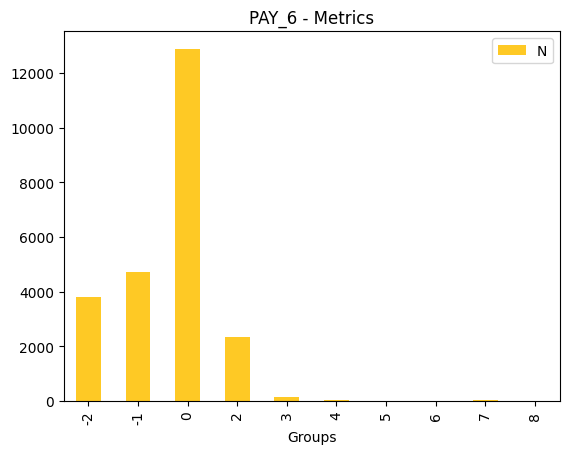

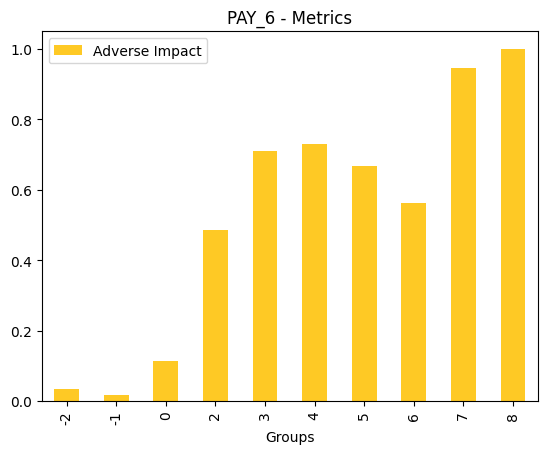

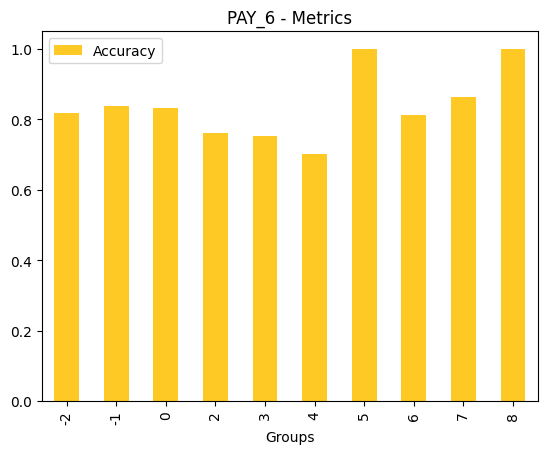

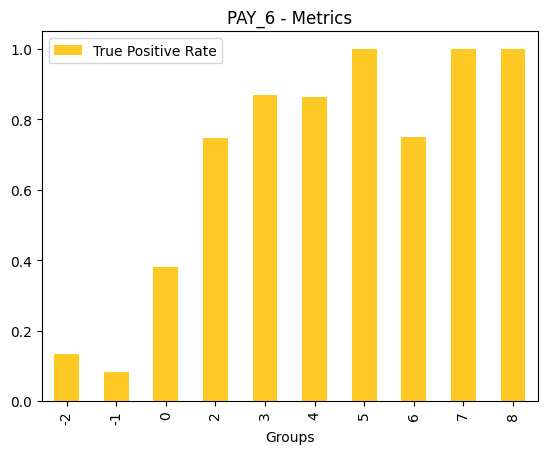

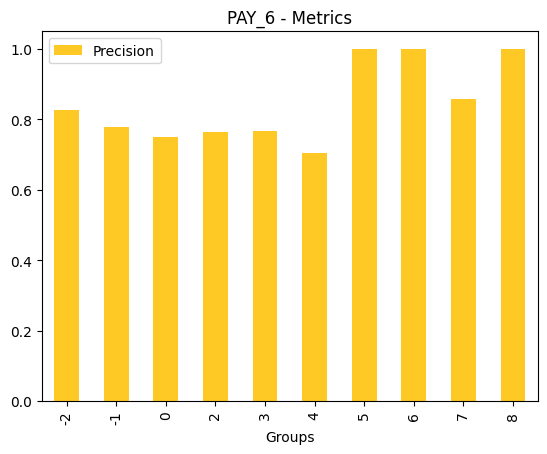

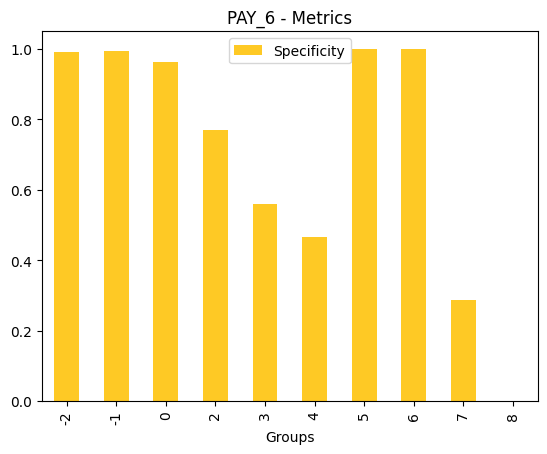

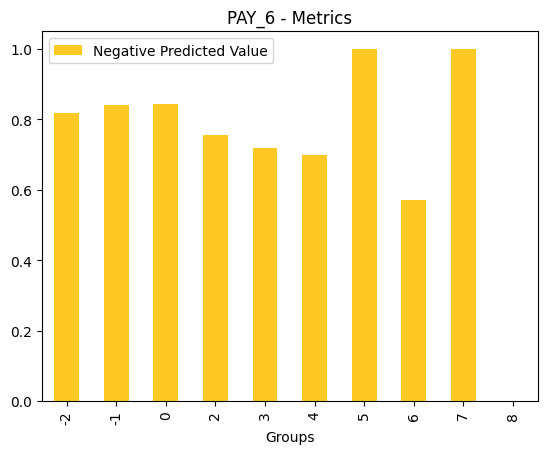

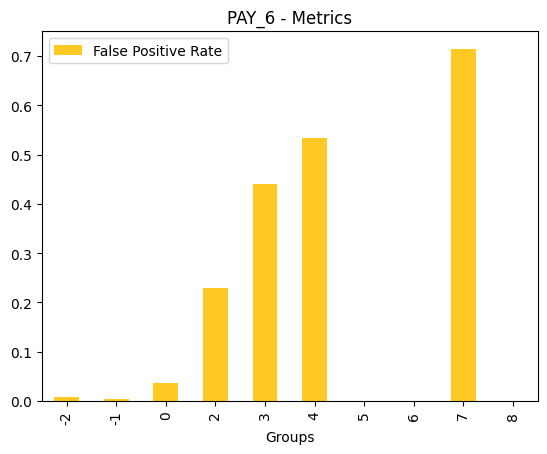

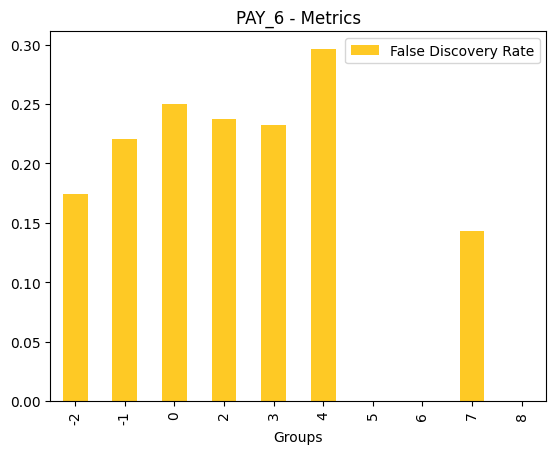

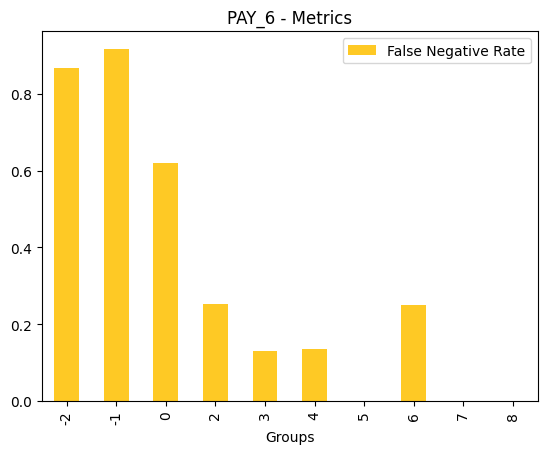

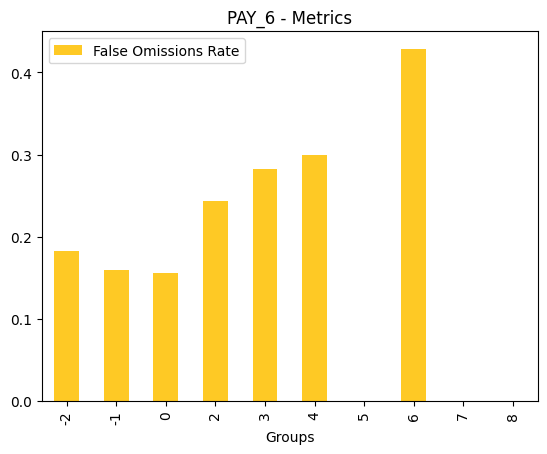

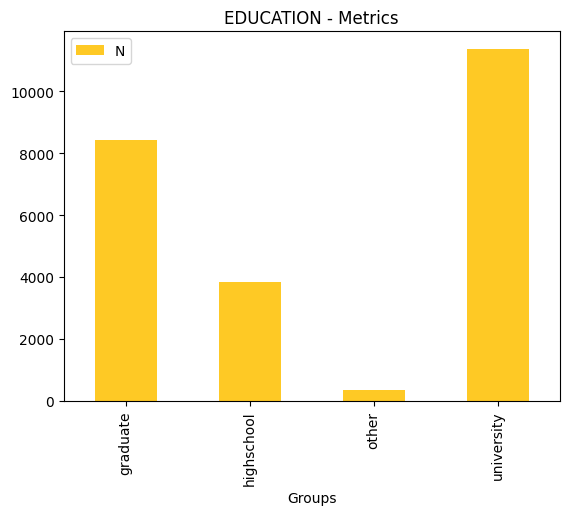

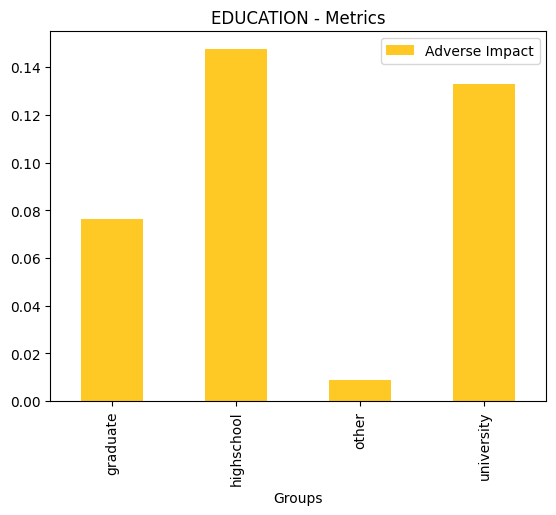

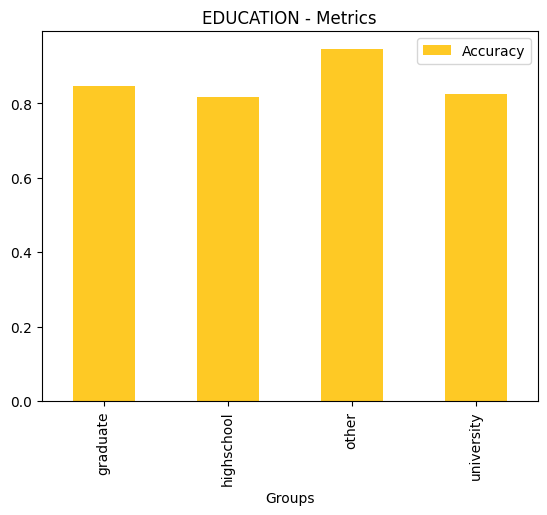

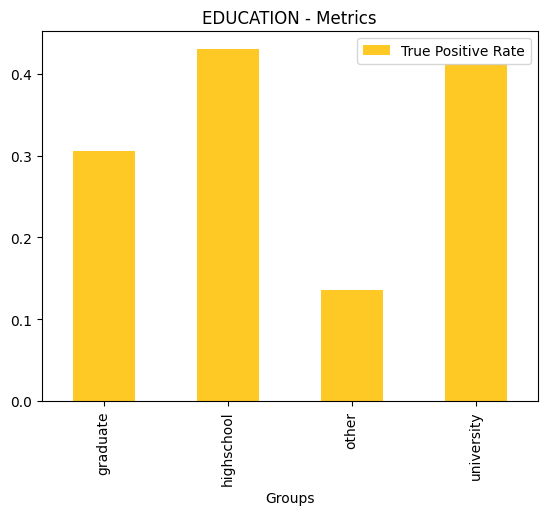

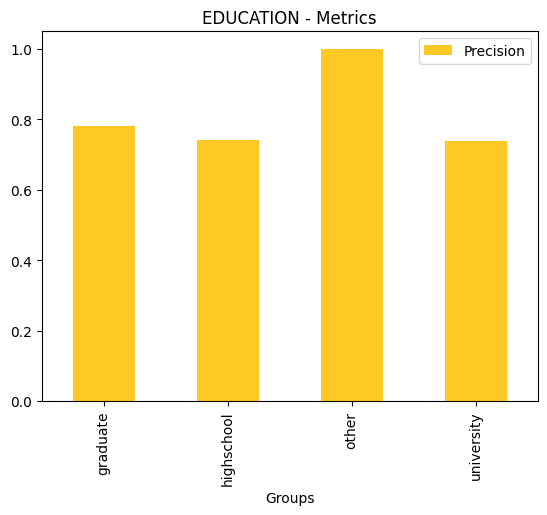

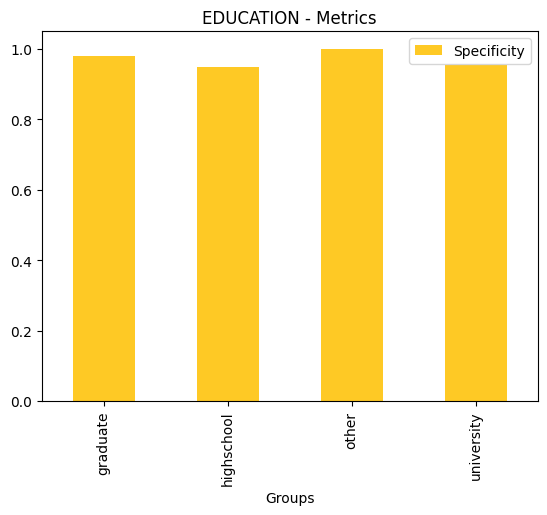

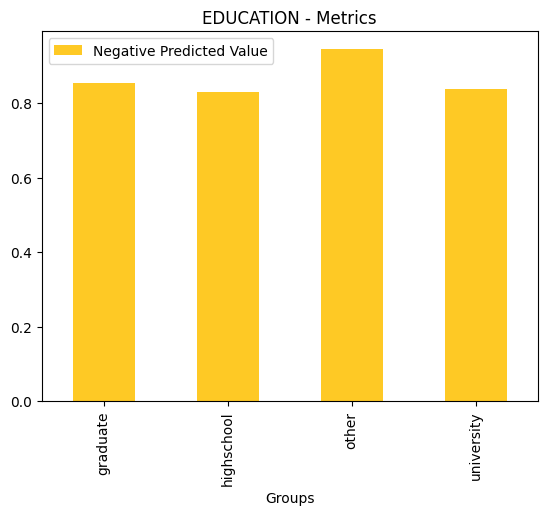

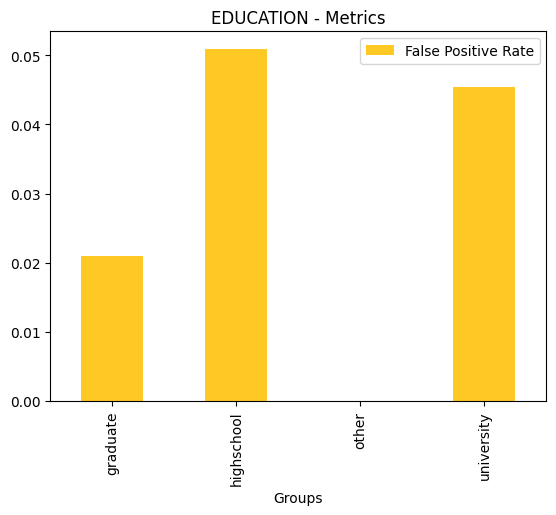

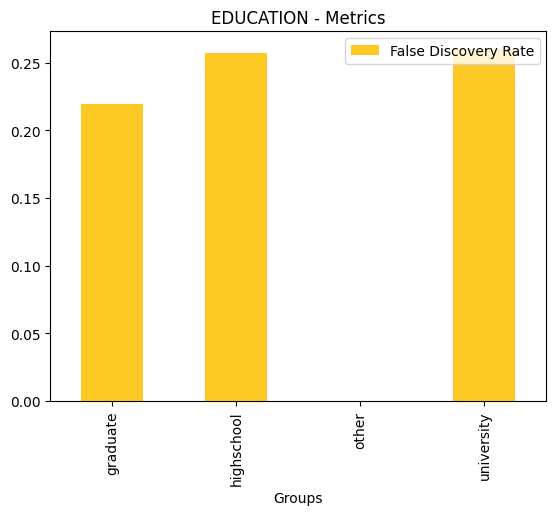

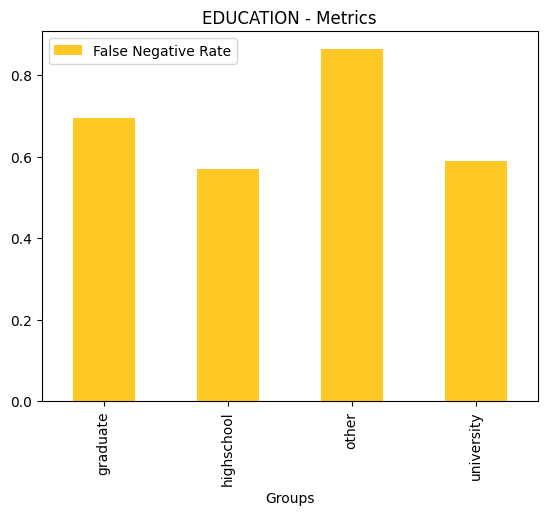

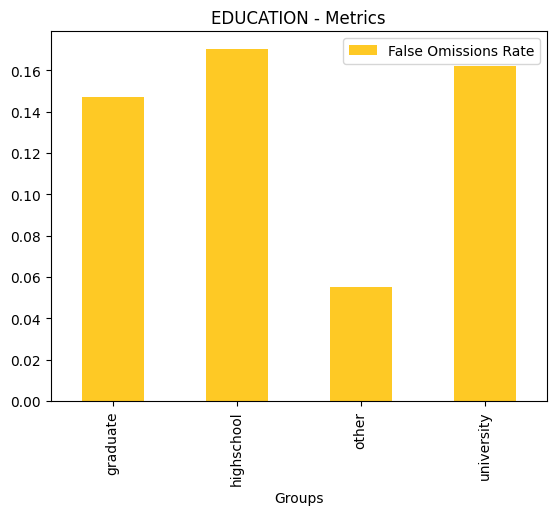

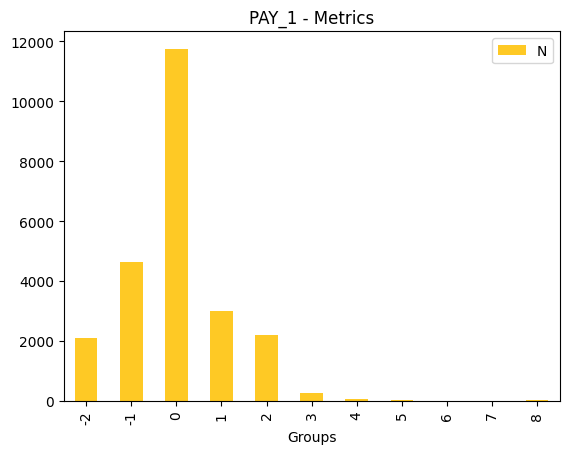

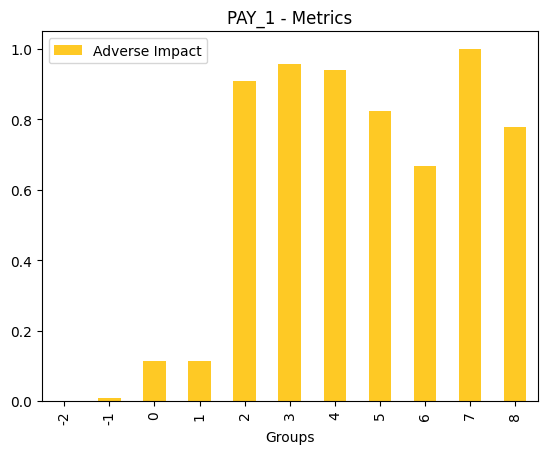

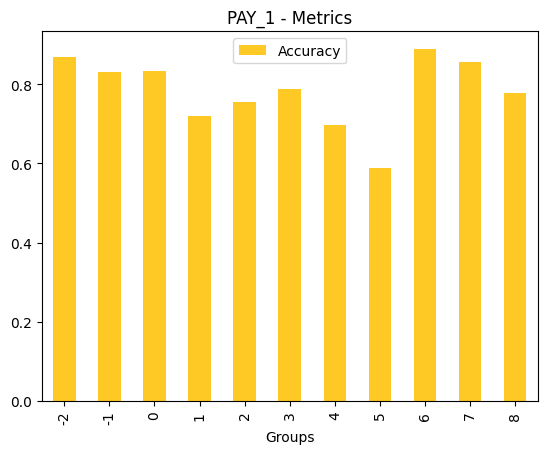

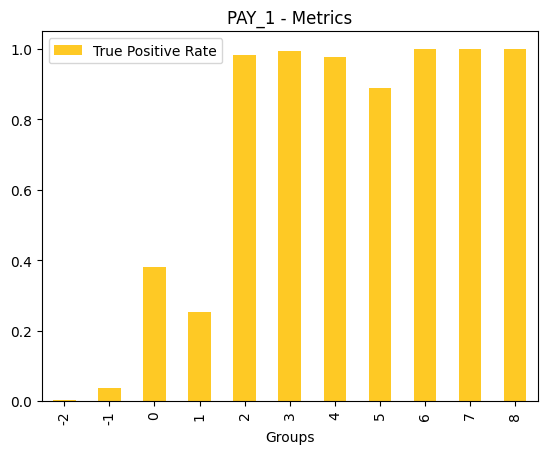

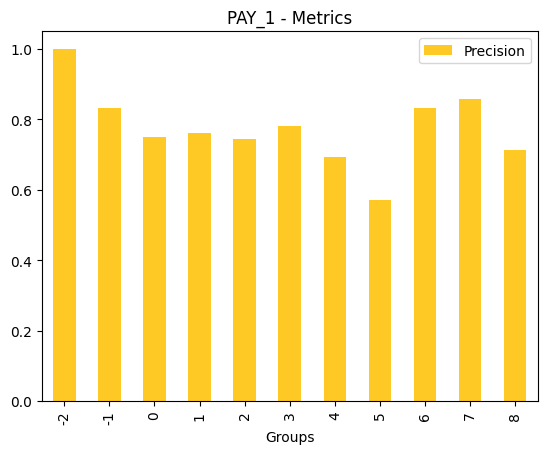

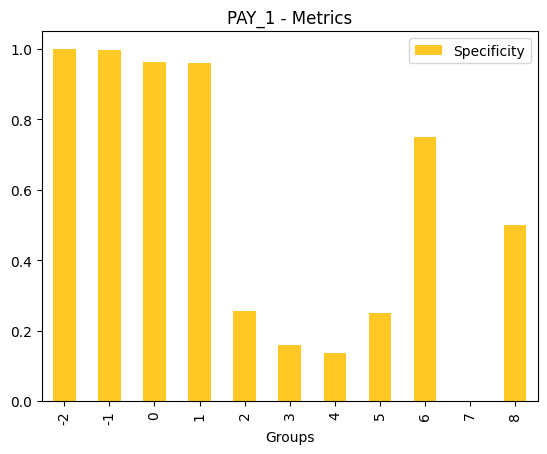

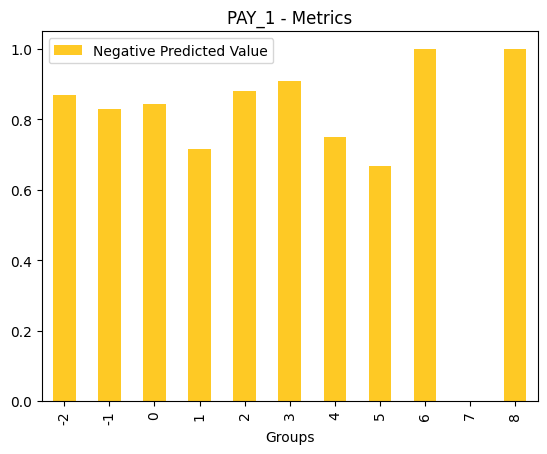

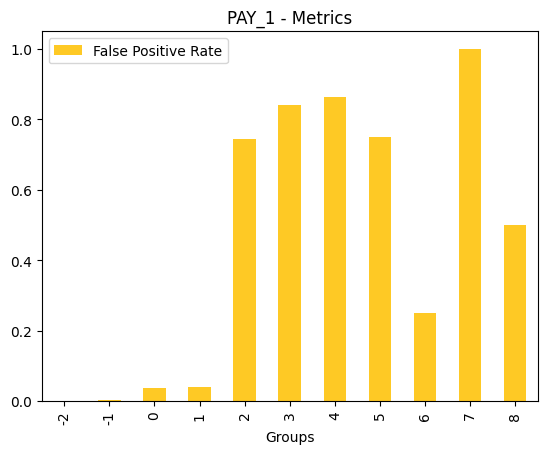

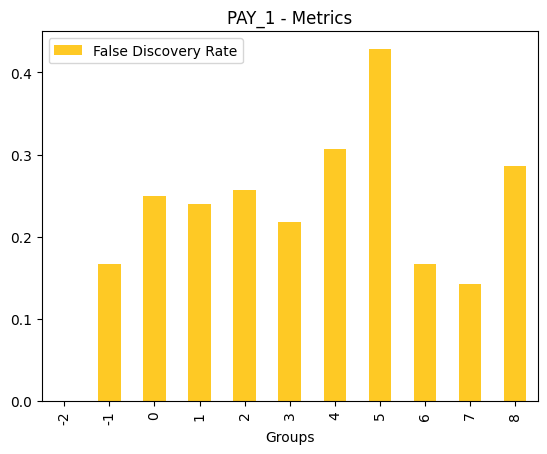

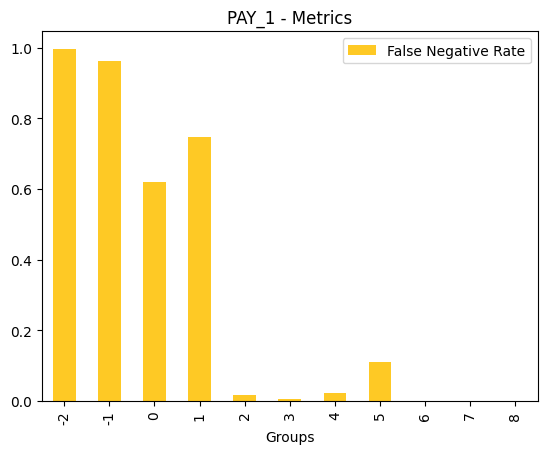

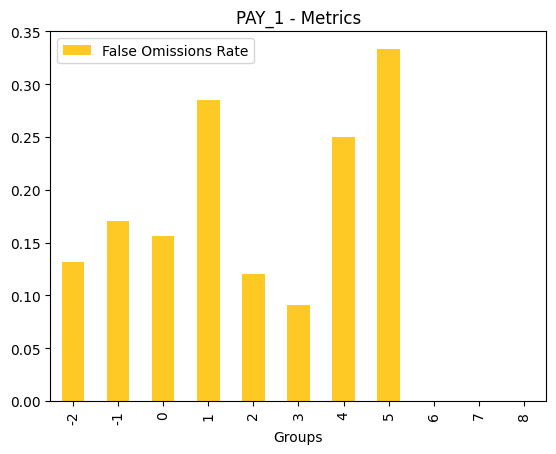

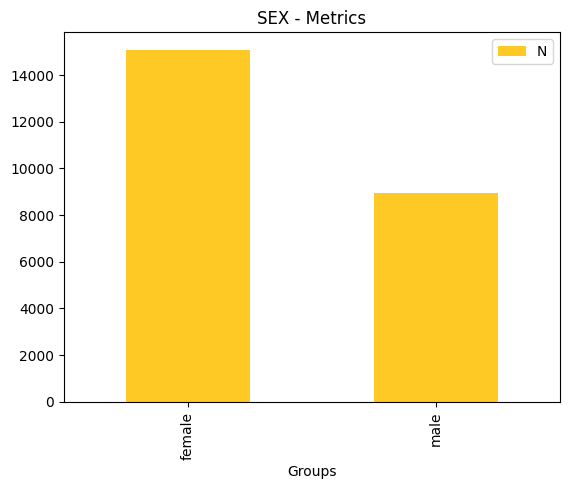

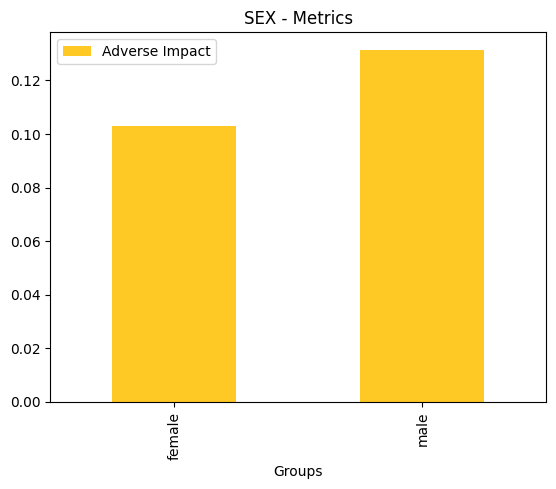

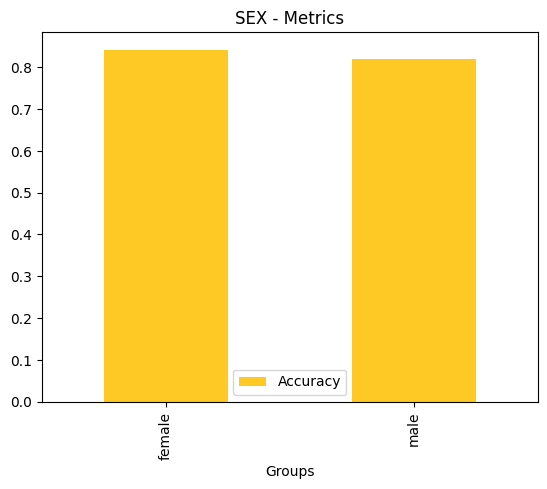

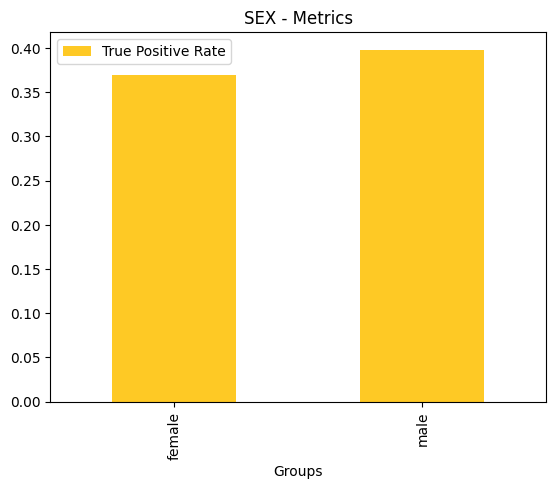

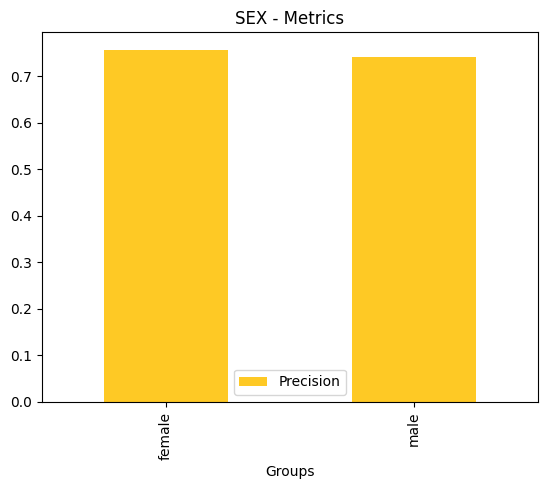

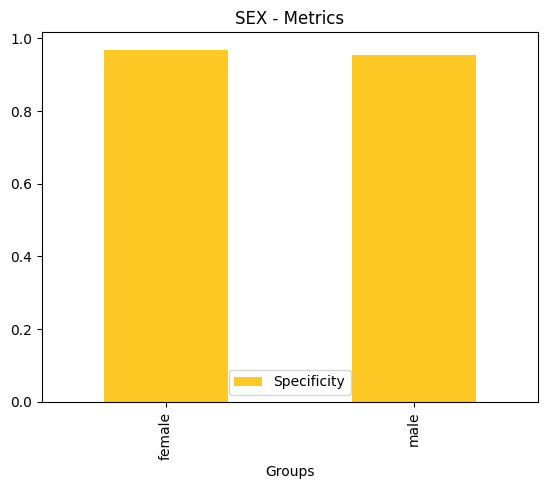

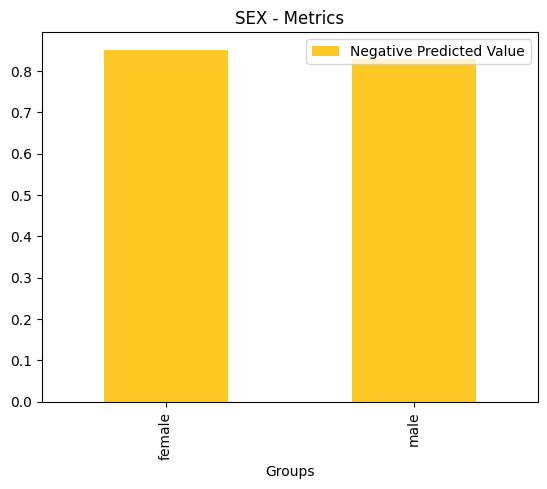

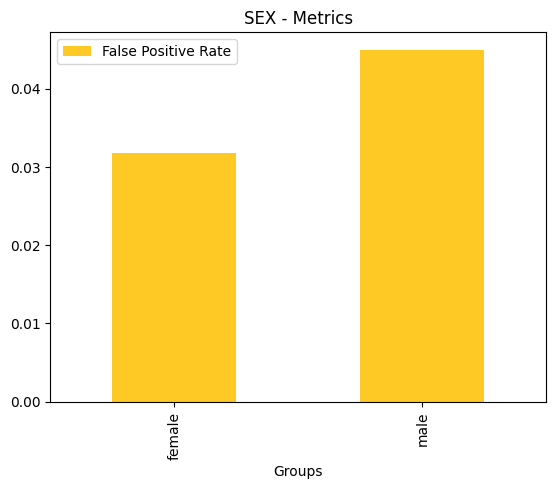

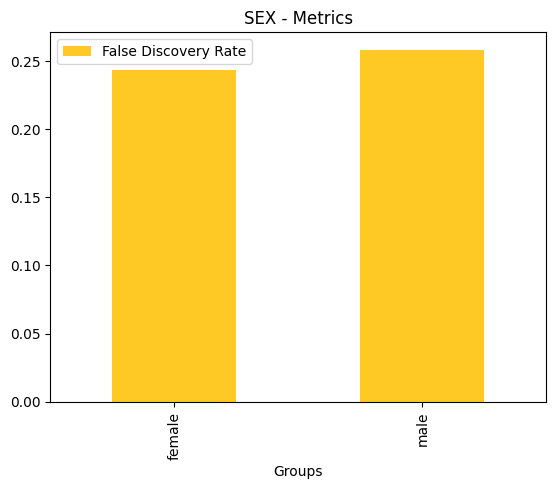

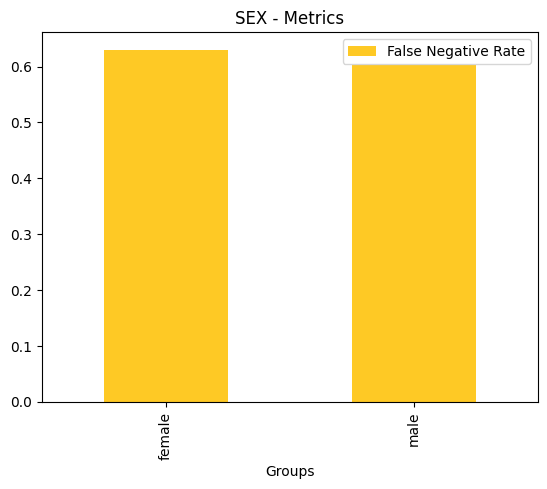

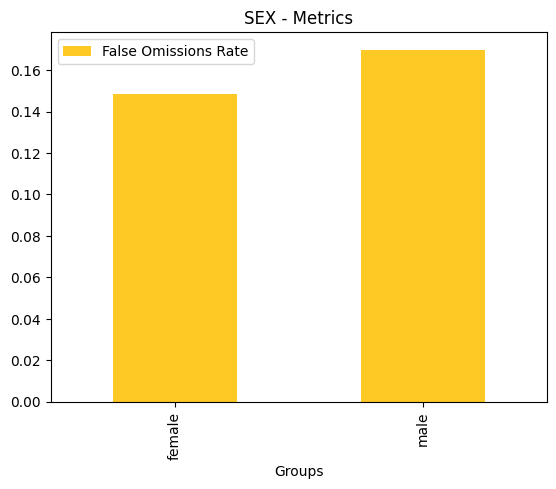

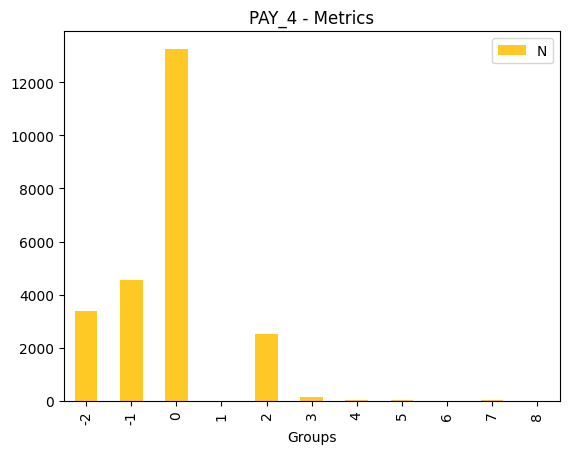

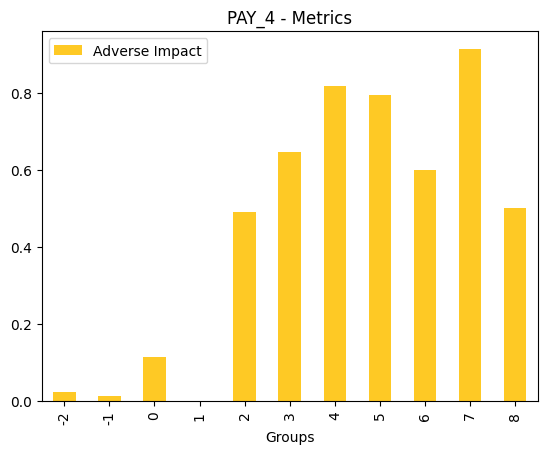

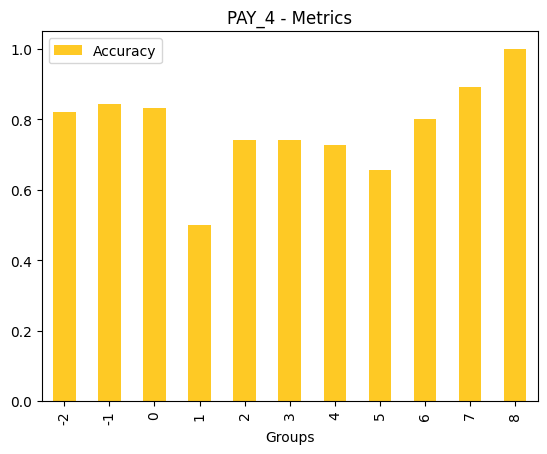

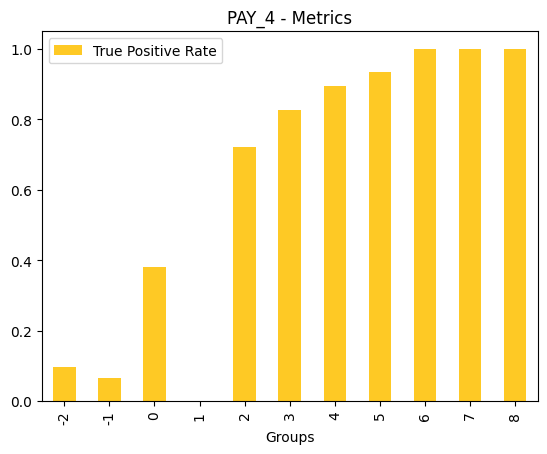

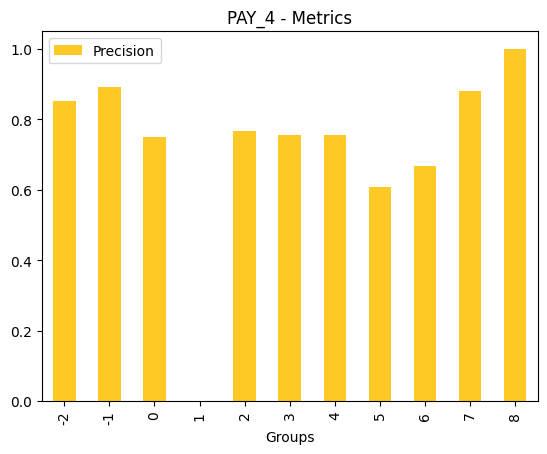

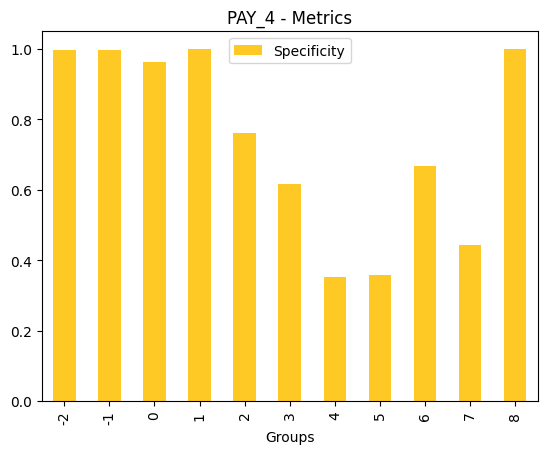

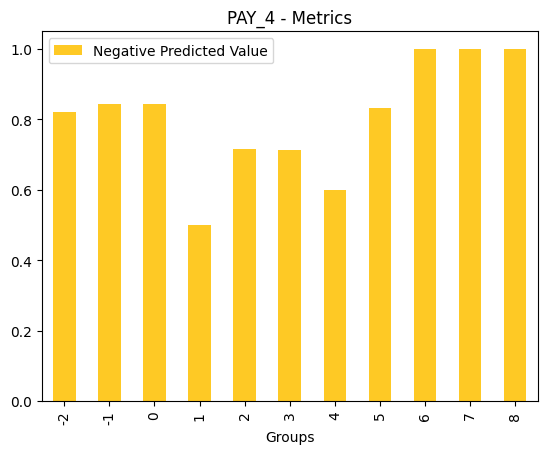

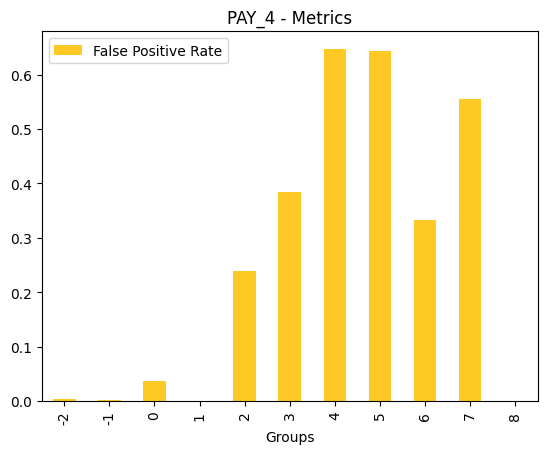

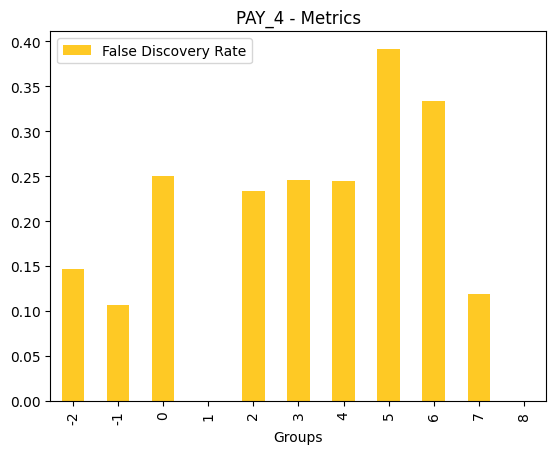

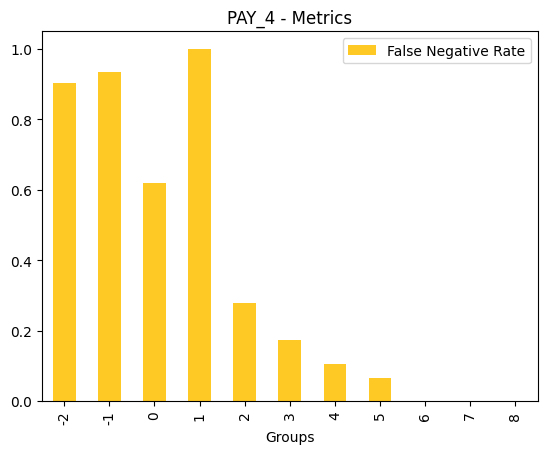

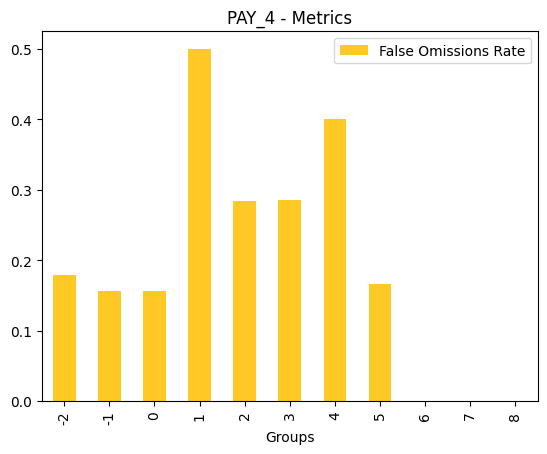

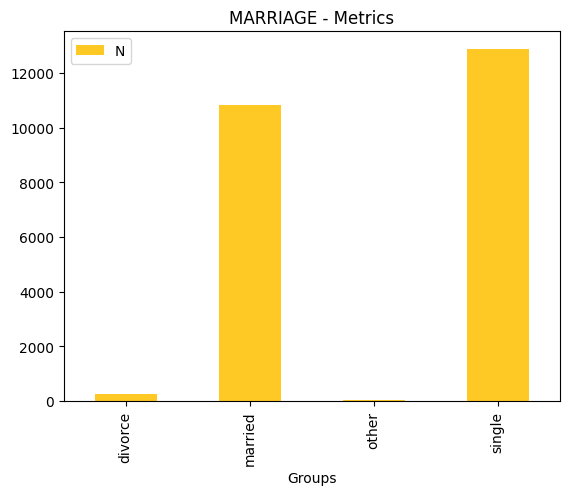

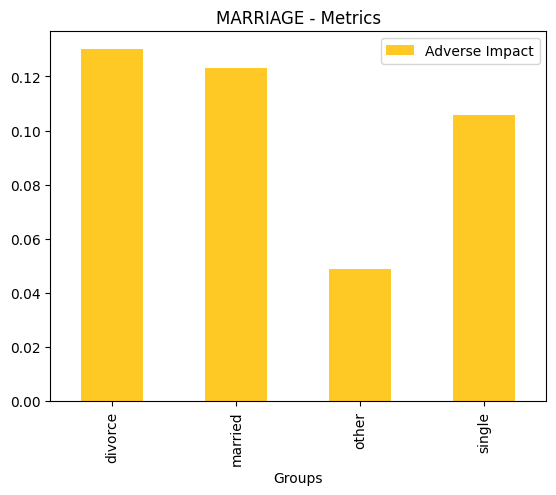

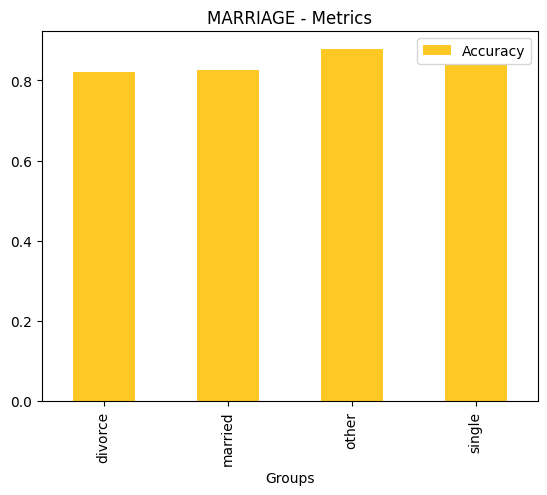

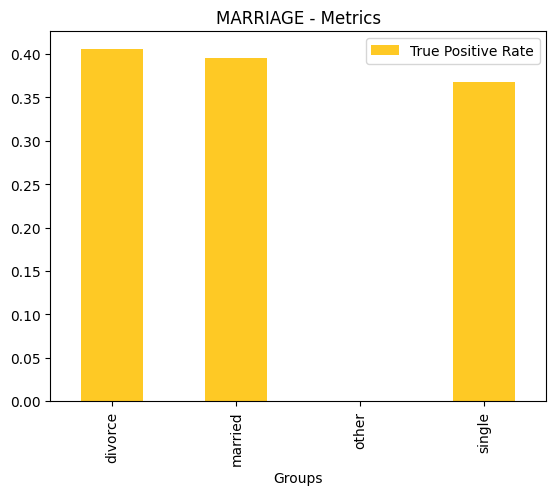

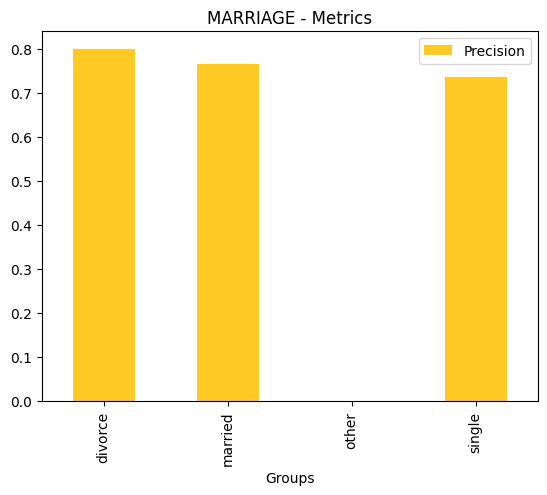

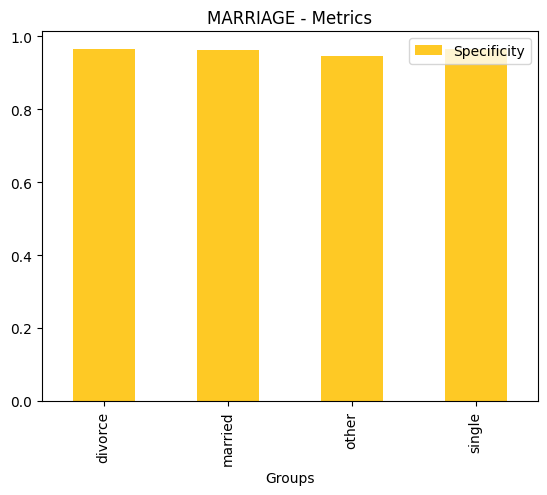

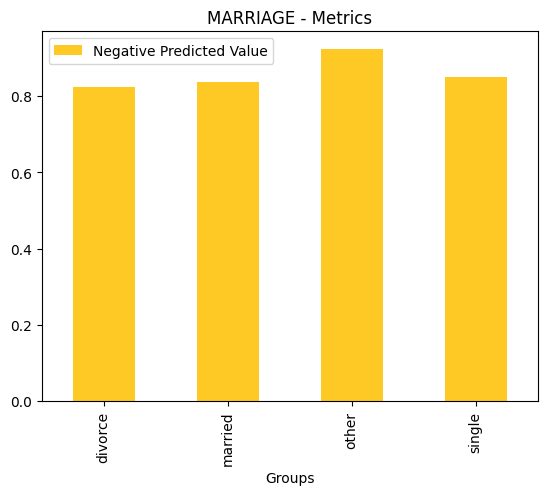

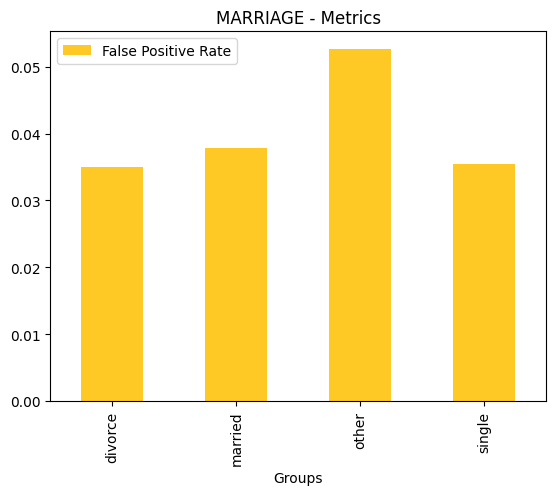

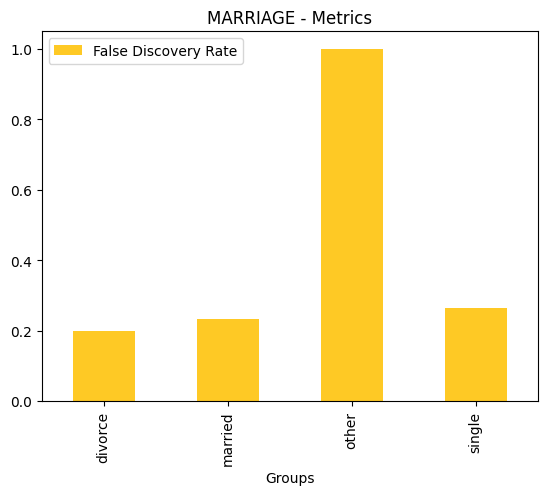

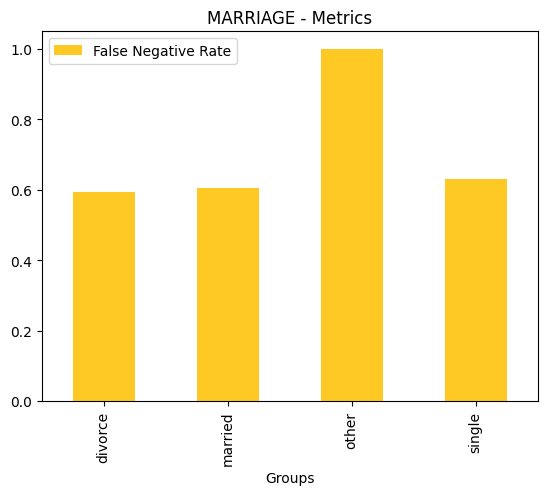

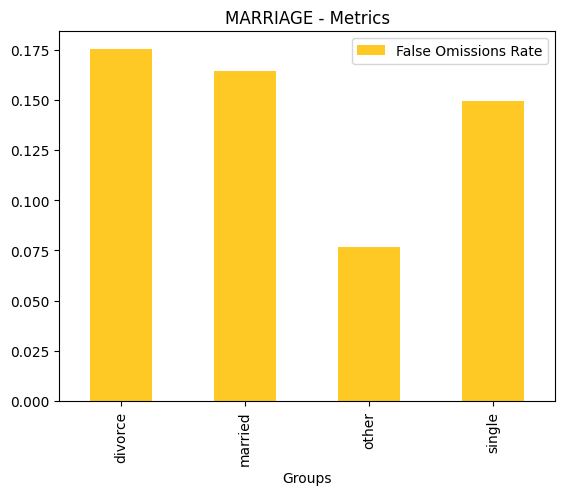

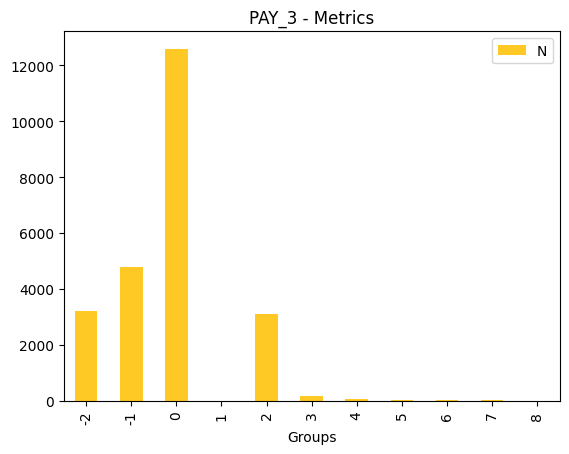

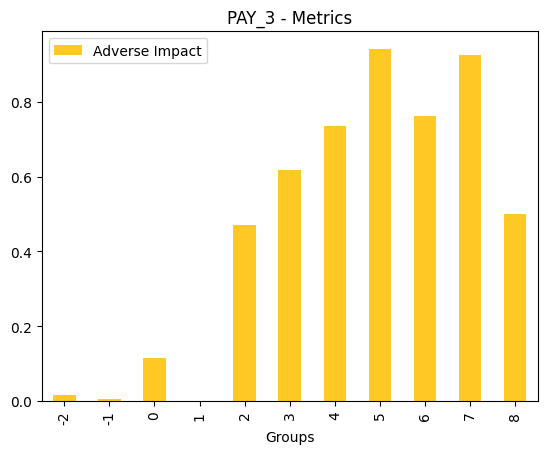

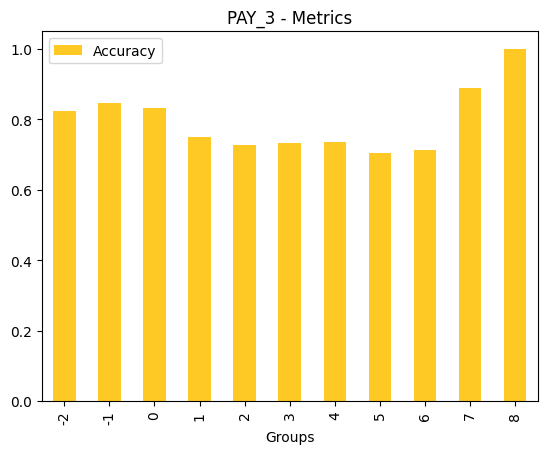

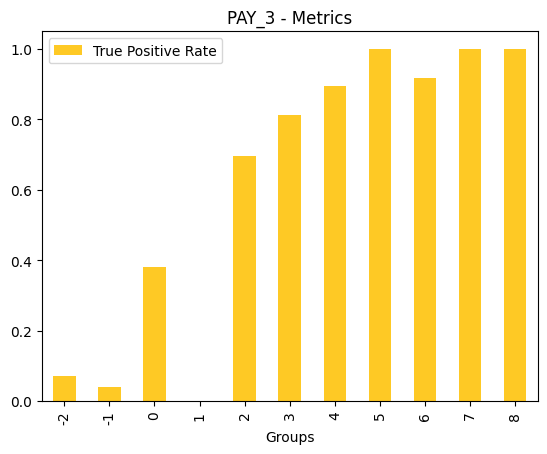

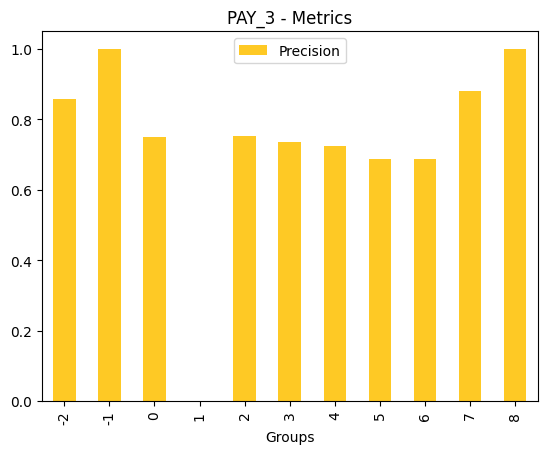

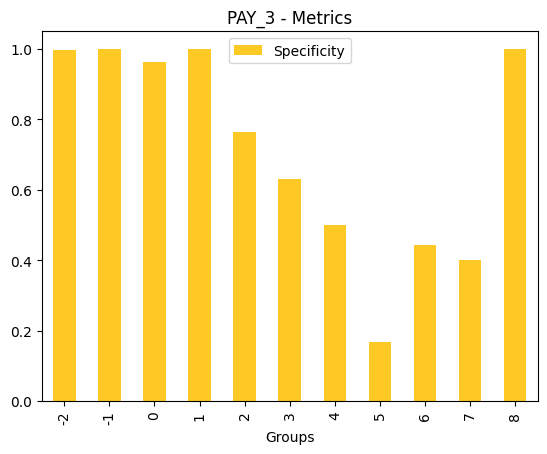

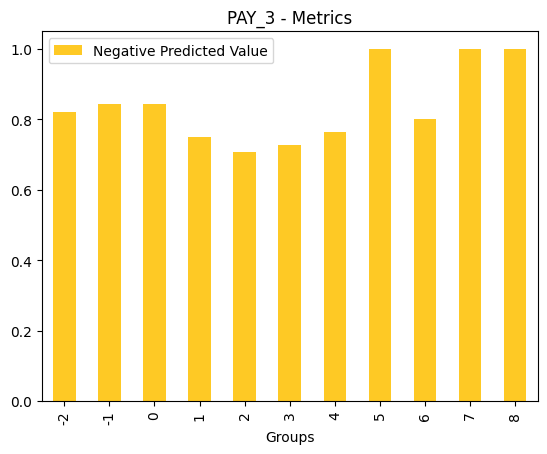

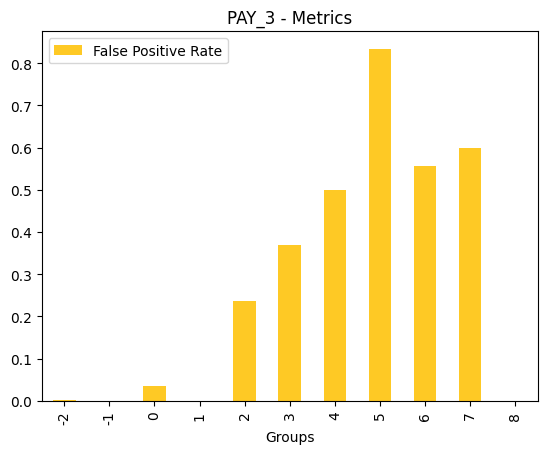

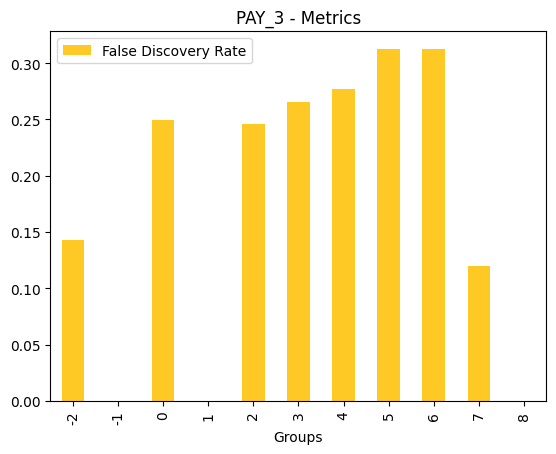

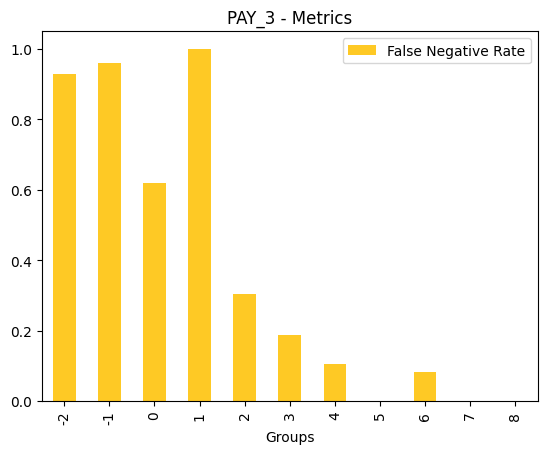

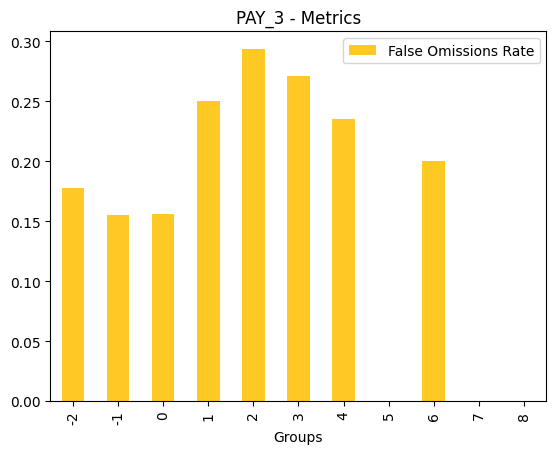

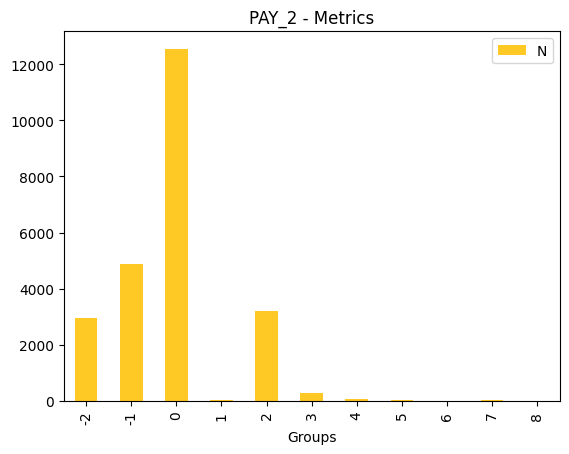

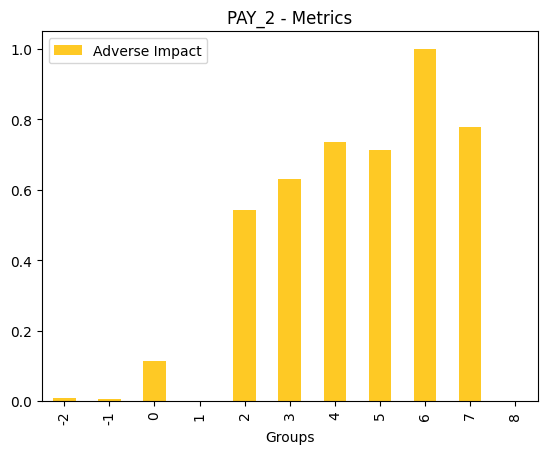

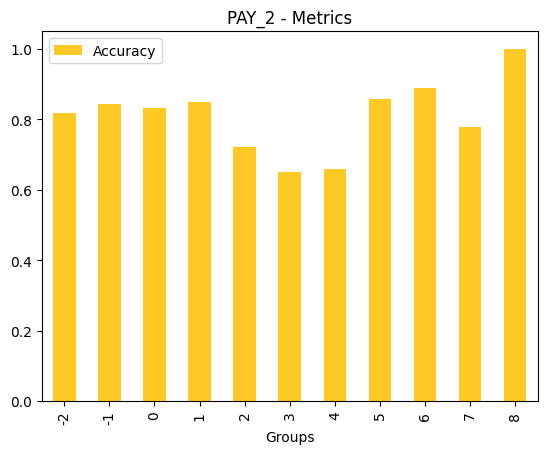

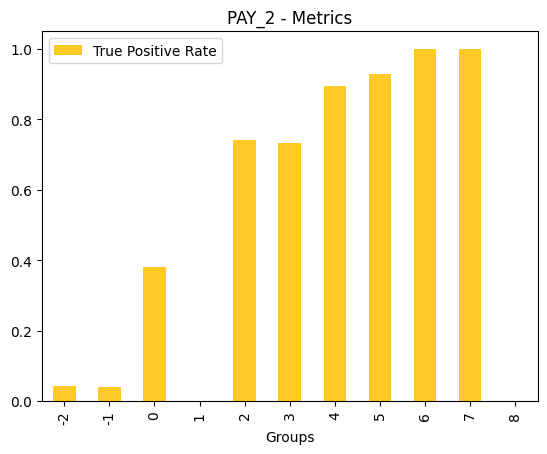

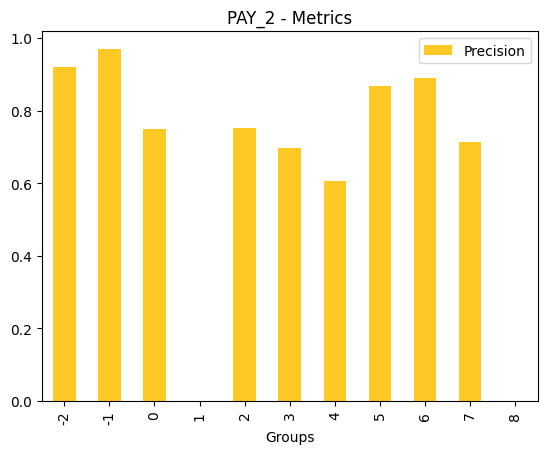

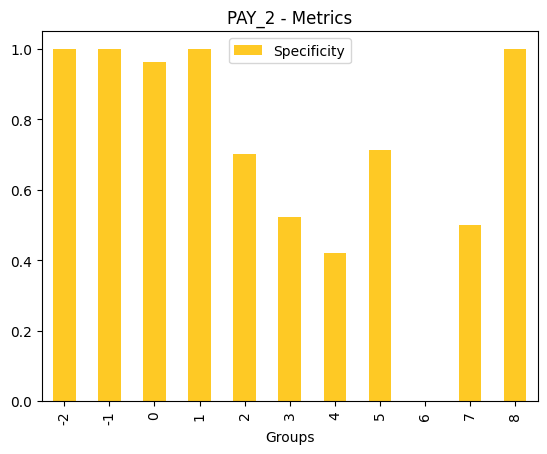

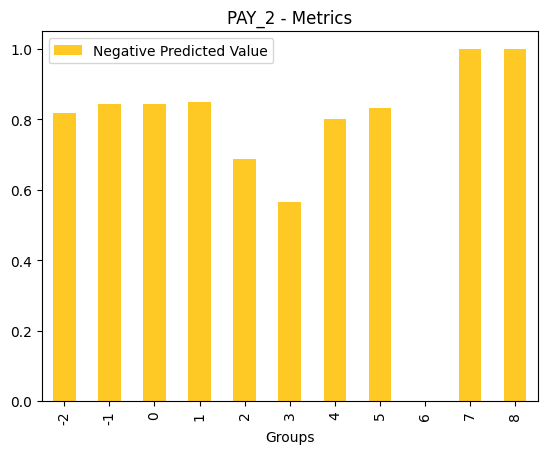

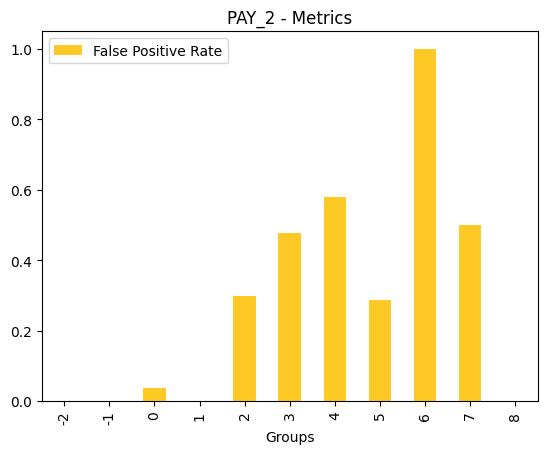

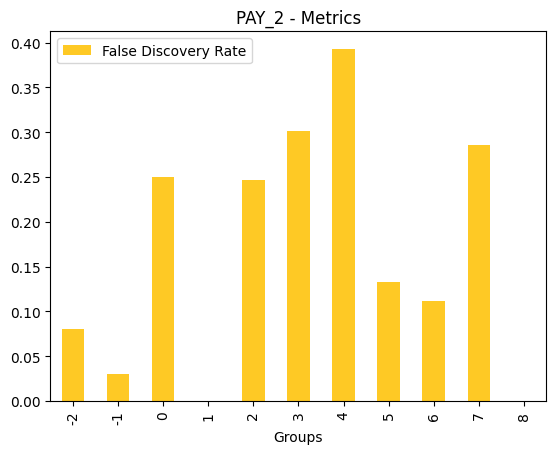

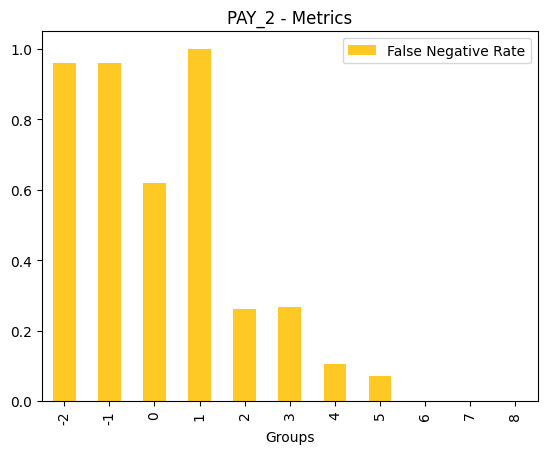

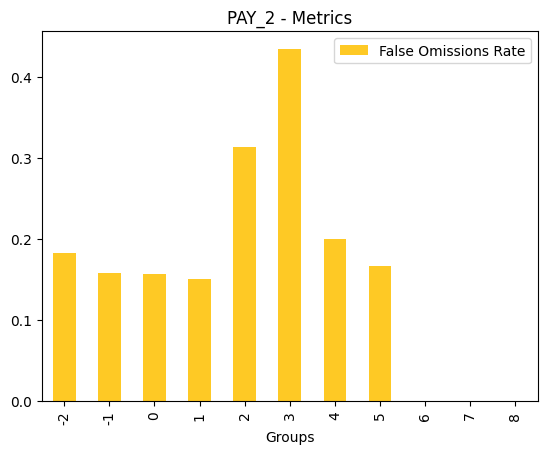

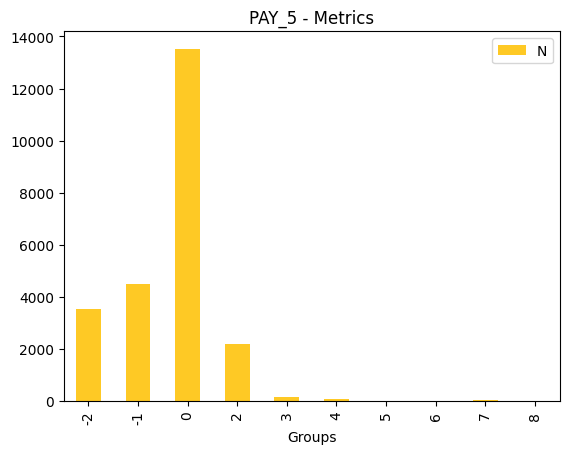

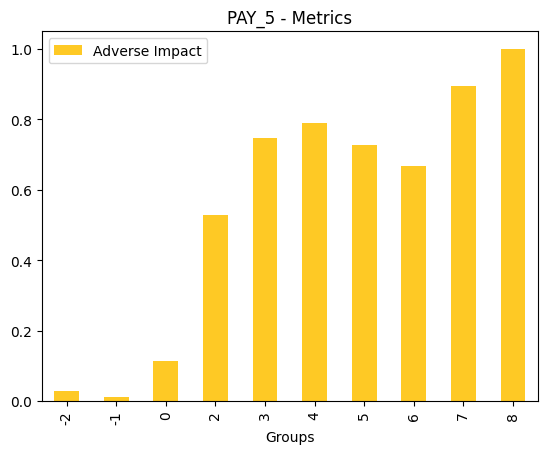

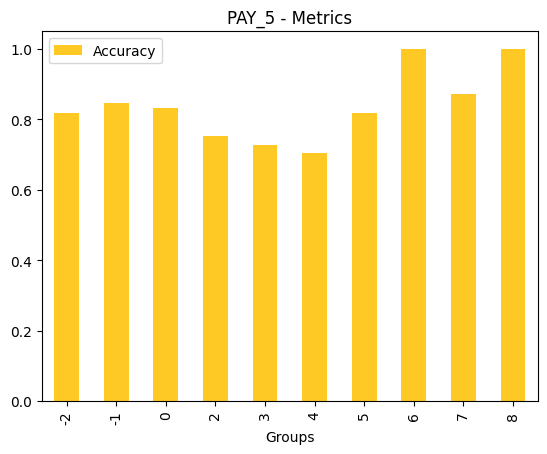

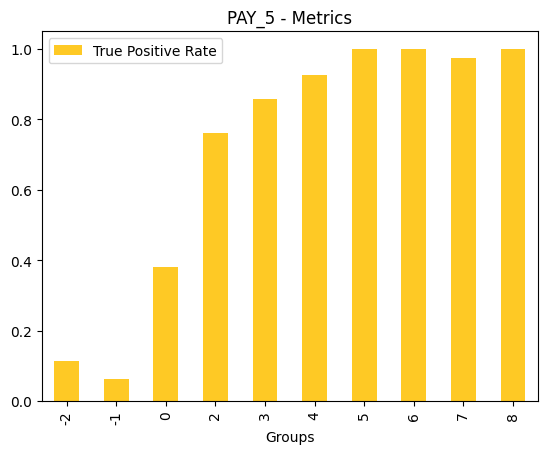

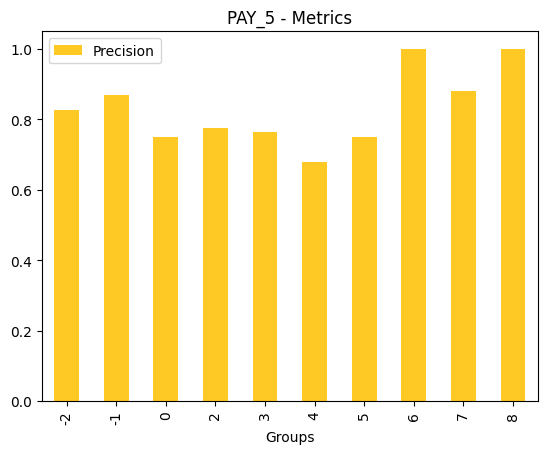

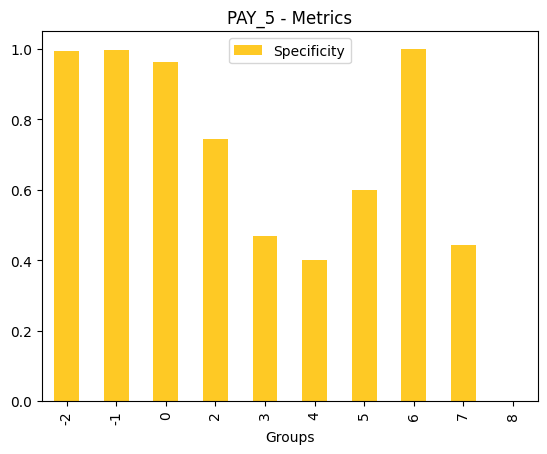

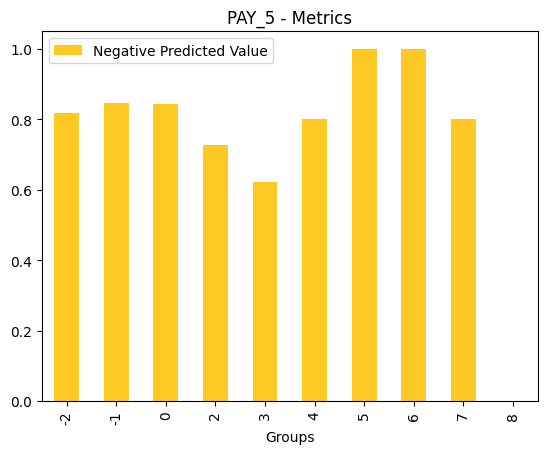

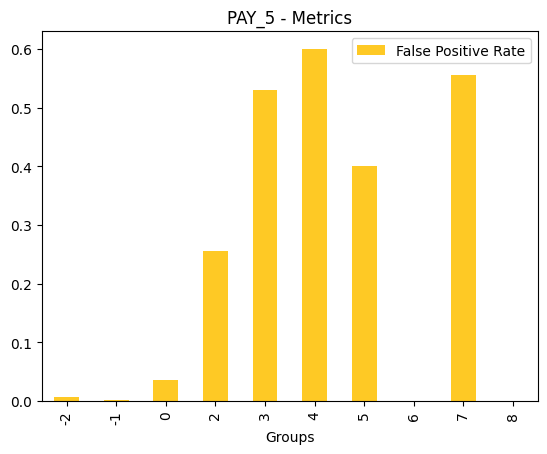

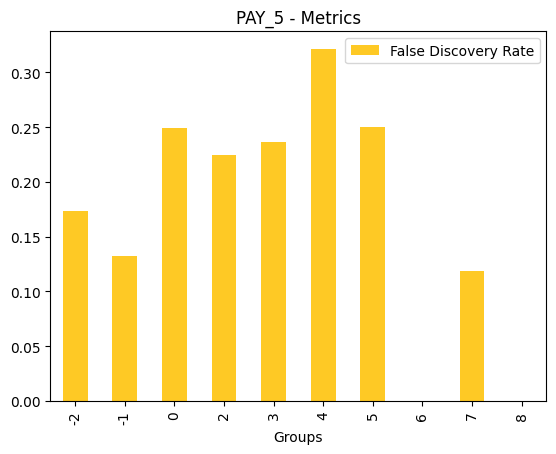

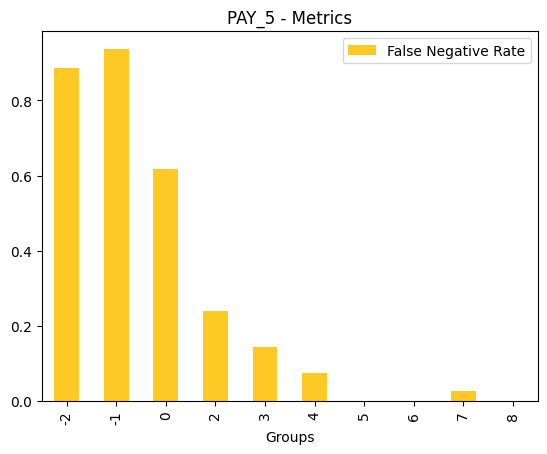

<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

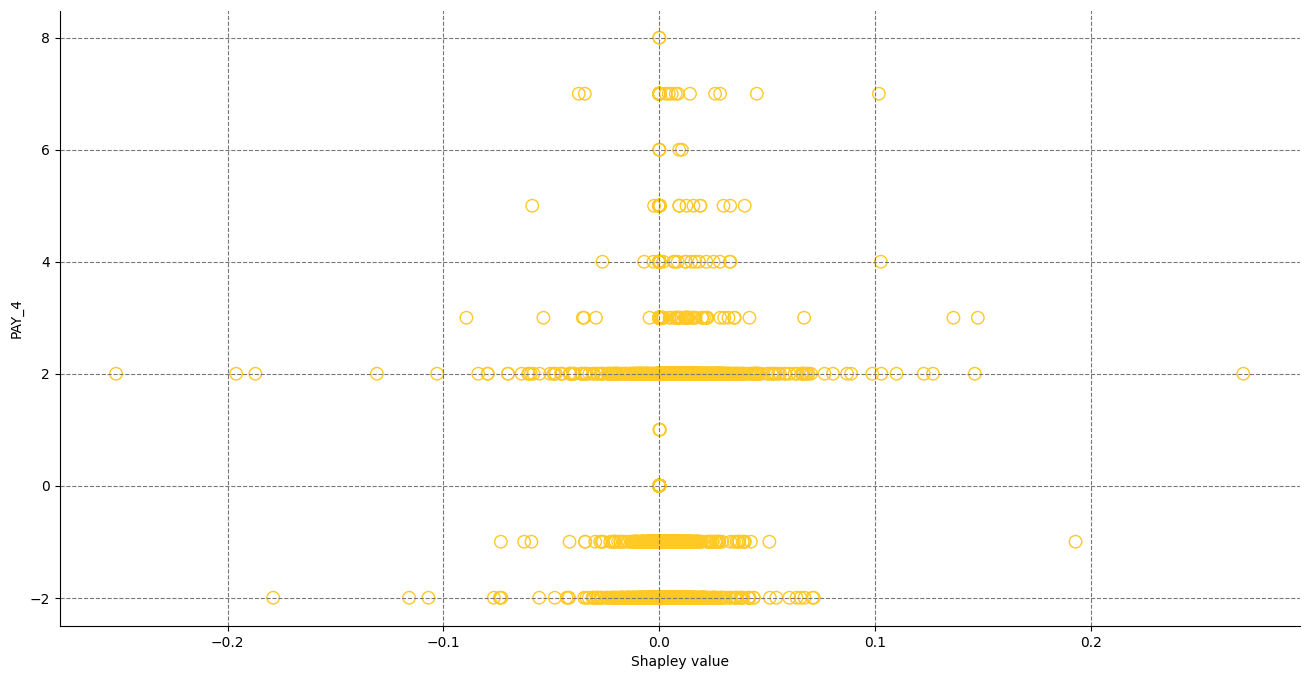

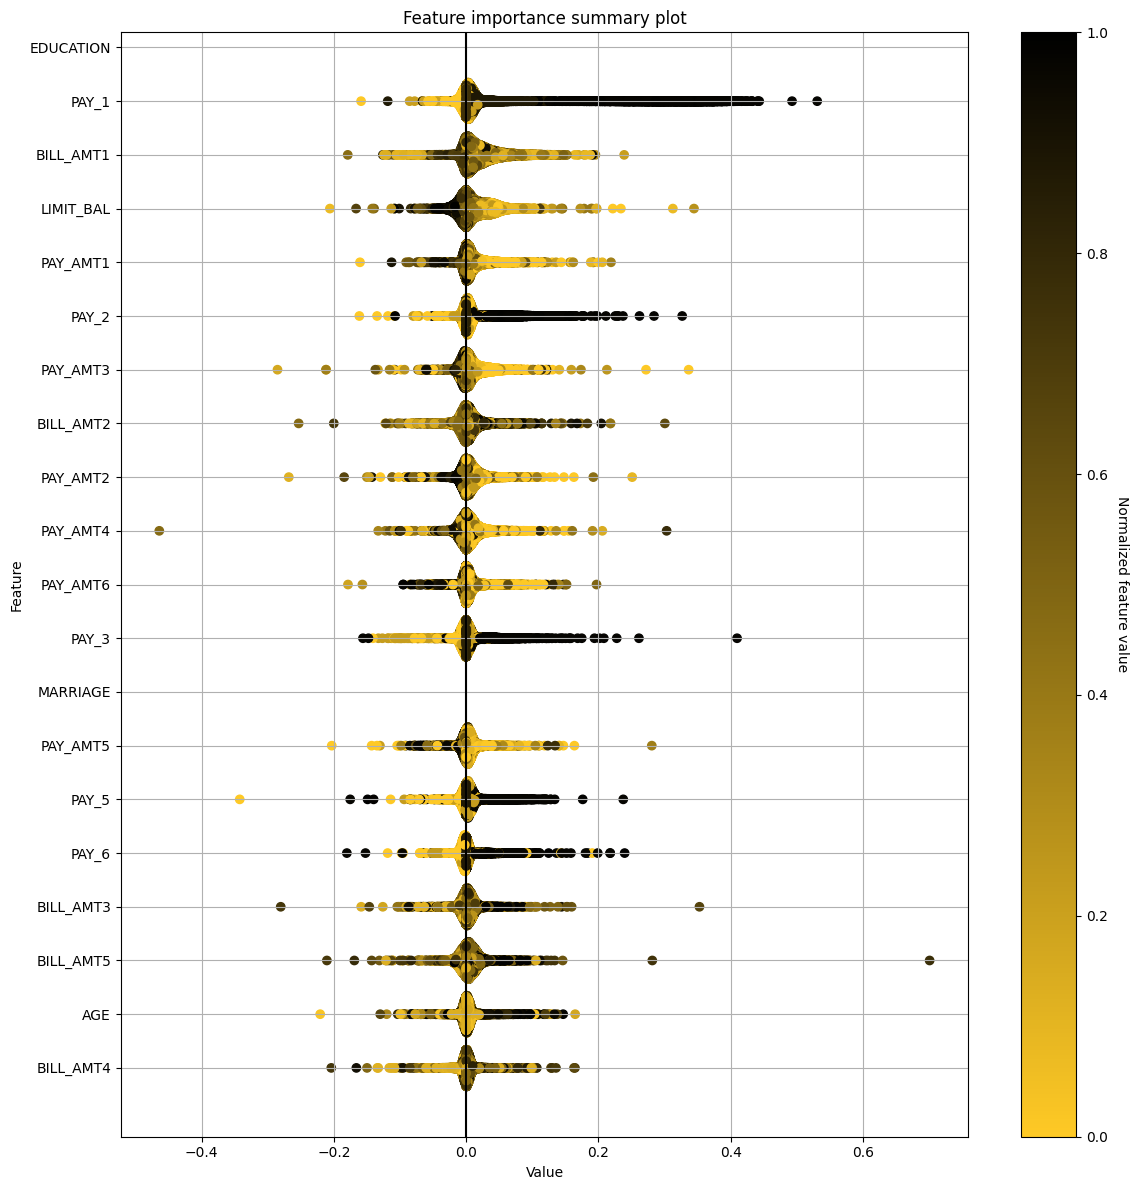

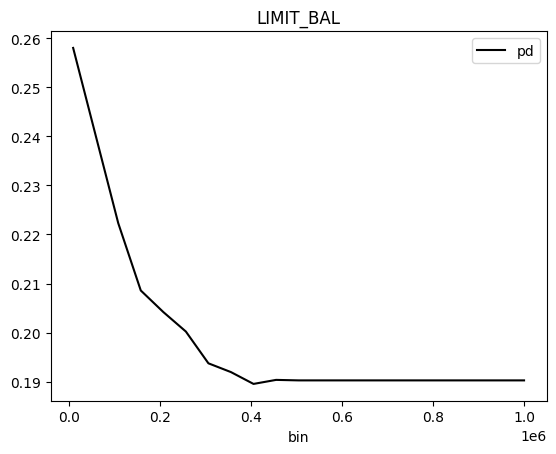

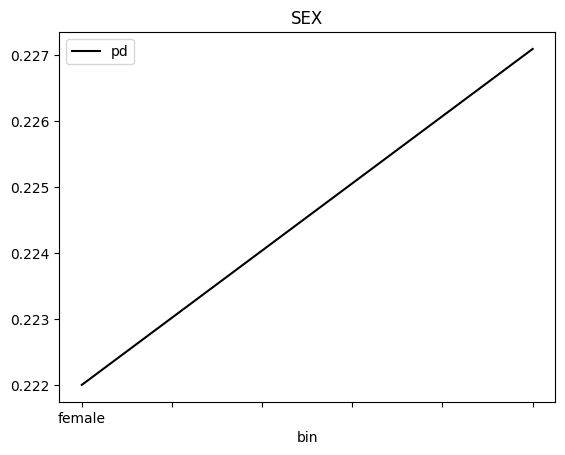

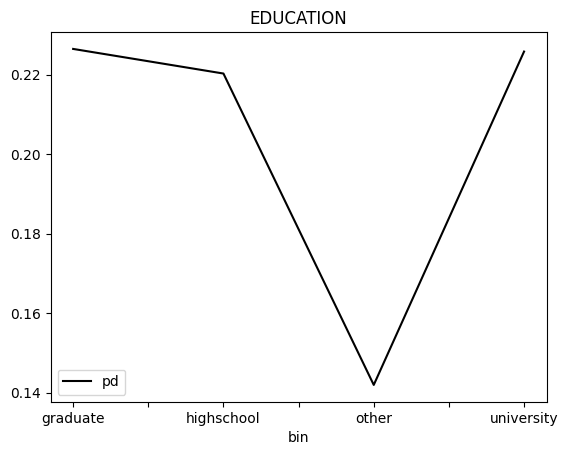

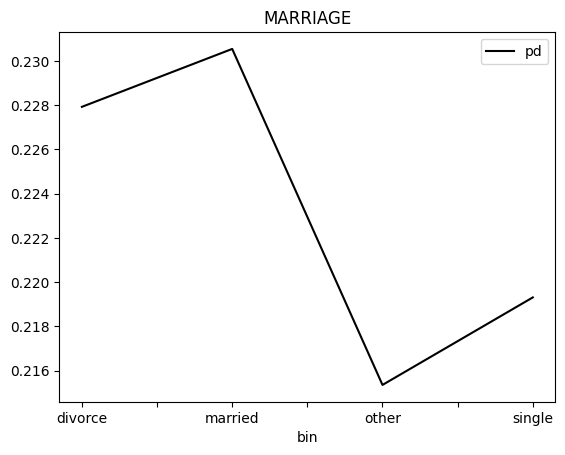

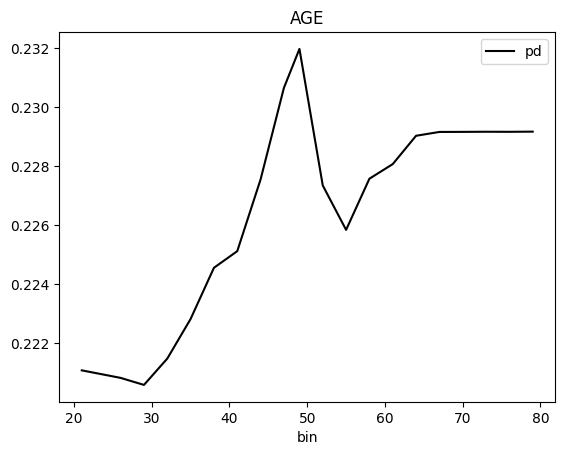

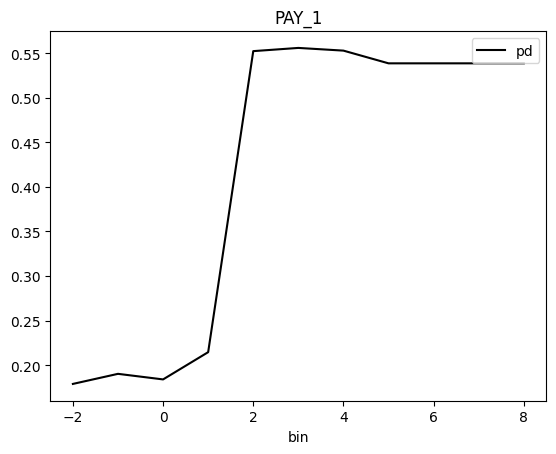

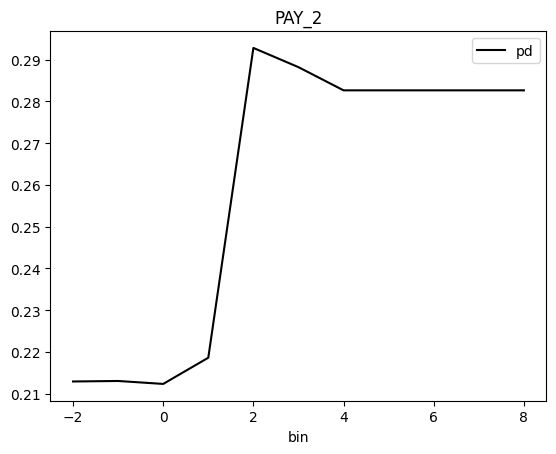

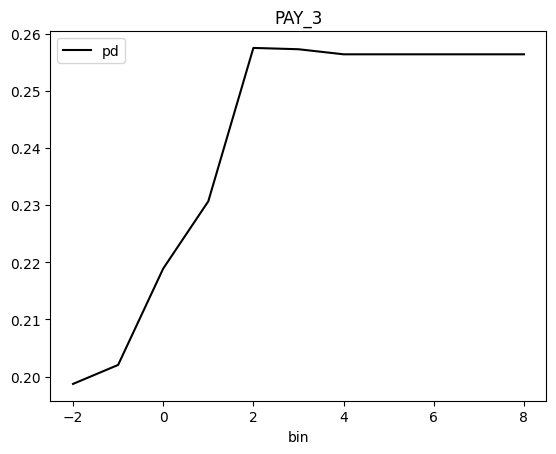

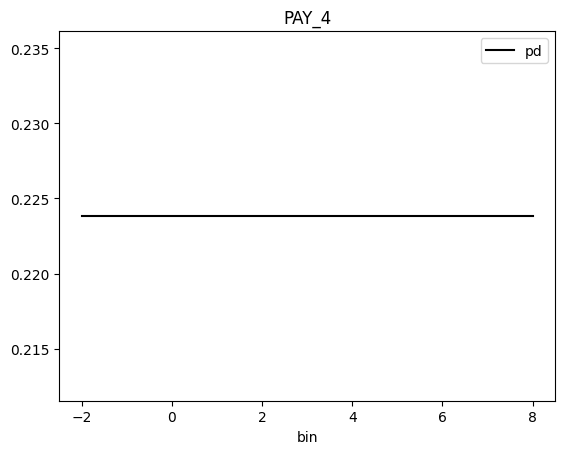

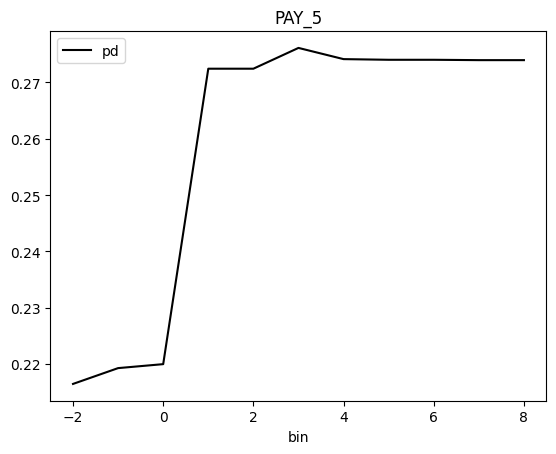

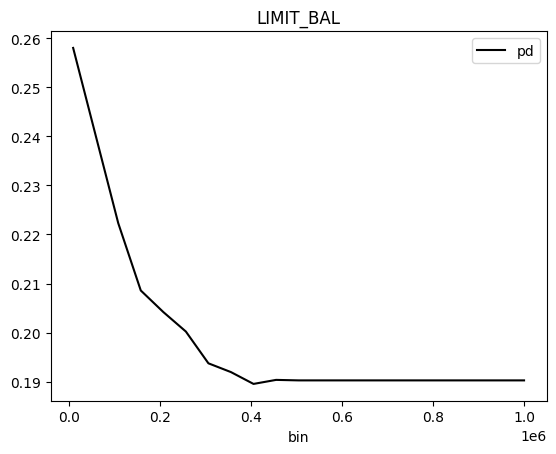

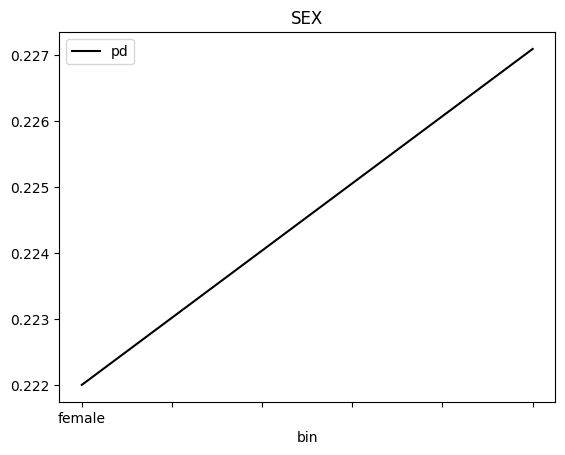

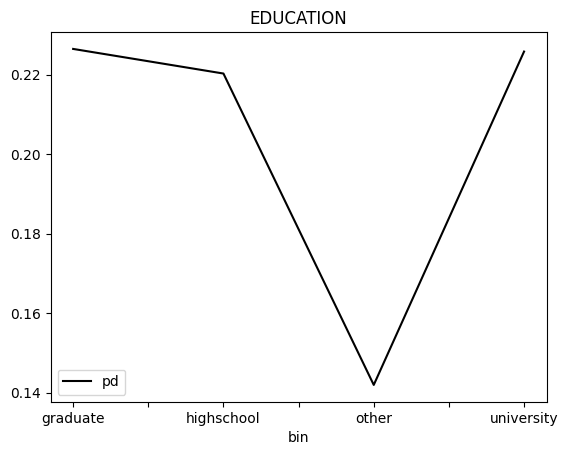

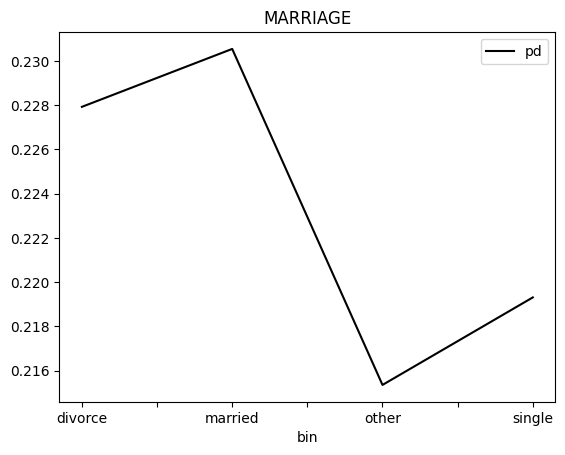

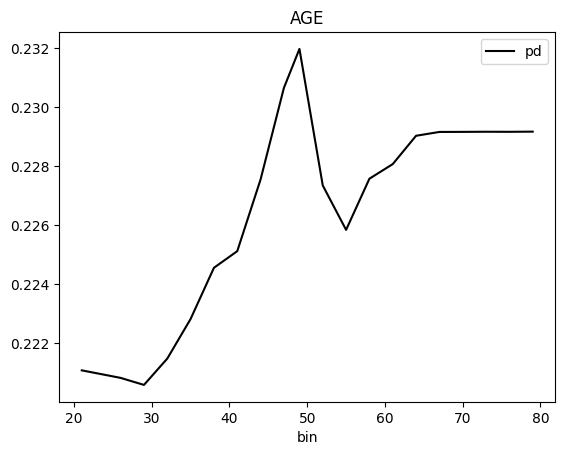

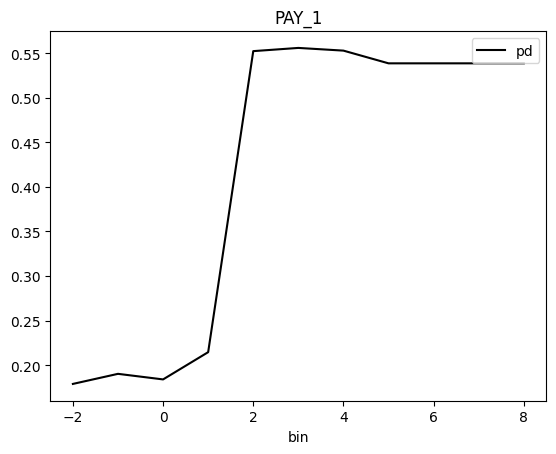

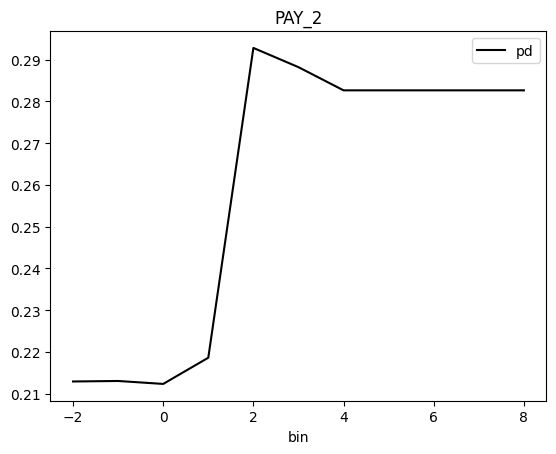

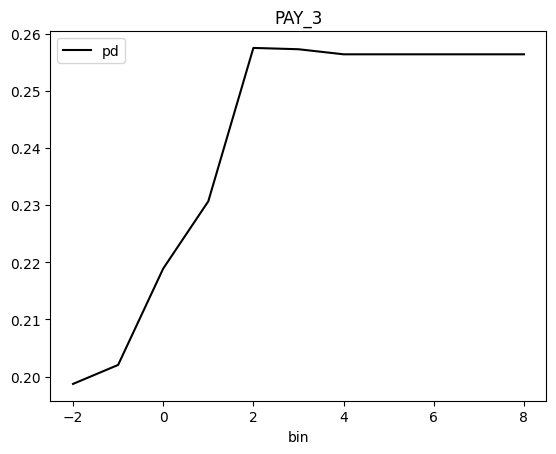

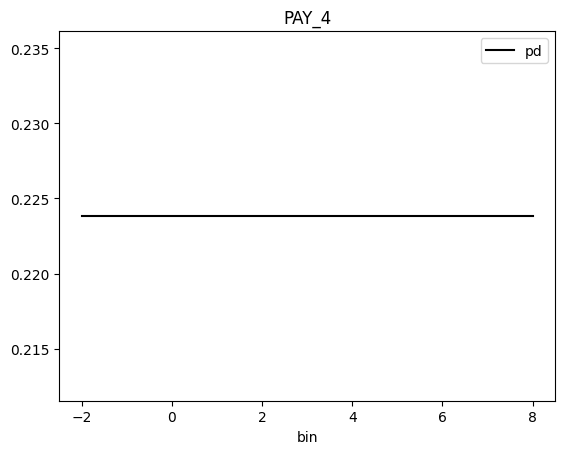

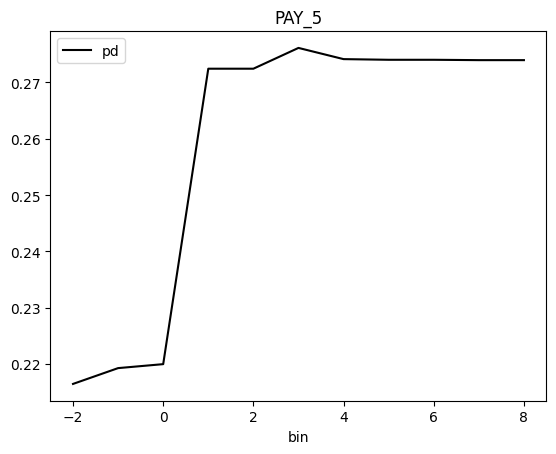

In [4]:
# run interpretation
interpretation = interpret.run_interpretation(
    dataset=dataset_path,
    model=local_model_rest_server_url,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
)

## Explainers Results

In [41]:
interpretation.get_successful_explainer_ids()

['h2o_sonar.explainers.dia_explainer.DiaExplainer',
 'h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainer',
 'h2o_sonar.explainers.pd_ice_explainer.PdIceExplainer']

In [42]:
interpretation.get_failed_explainer_ids()

[]

### PD/ICE Explainer

In [43]:
# retrieve the result
result = interpretation.get_explainer_result(
    pd_explainer.PdIceExplainer.explainer_id()
)

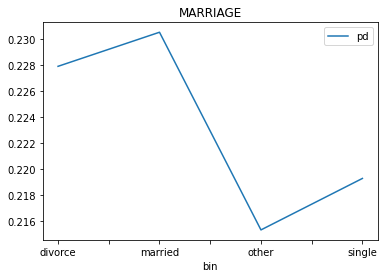

In [46]:
result.plot(feature_name="MARRIAGE")

In [47]:
result.data(feature_name="PAY_1")

<Frame#7f89fb1f0d50 11x4>

### Decision Tree Explainer

In [48]:
# retrieve the result
result = interpretation.get_explainer_result(
    dt_explainer.DecisionTreeSurrogateExplainer.explainer_id()
)

In [49]:
# summary
result.summary()

{'debug_residuals': False,
 'debug_residuals_class': '1',
 'dt_tree_depth': 3,
 'nfolds': 3,
 'qbin_cols': None,
 'qbin_count': 0,
 'categorical_encoding': 'AUTO'}

### Plot Explainer Data

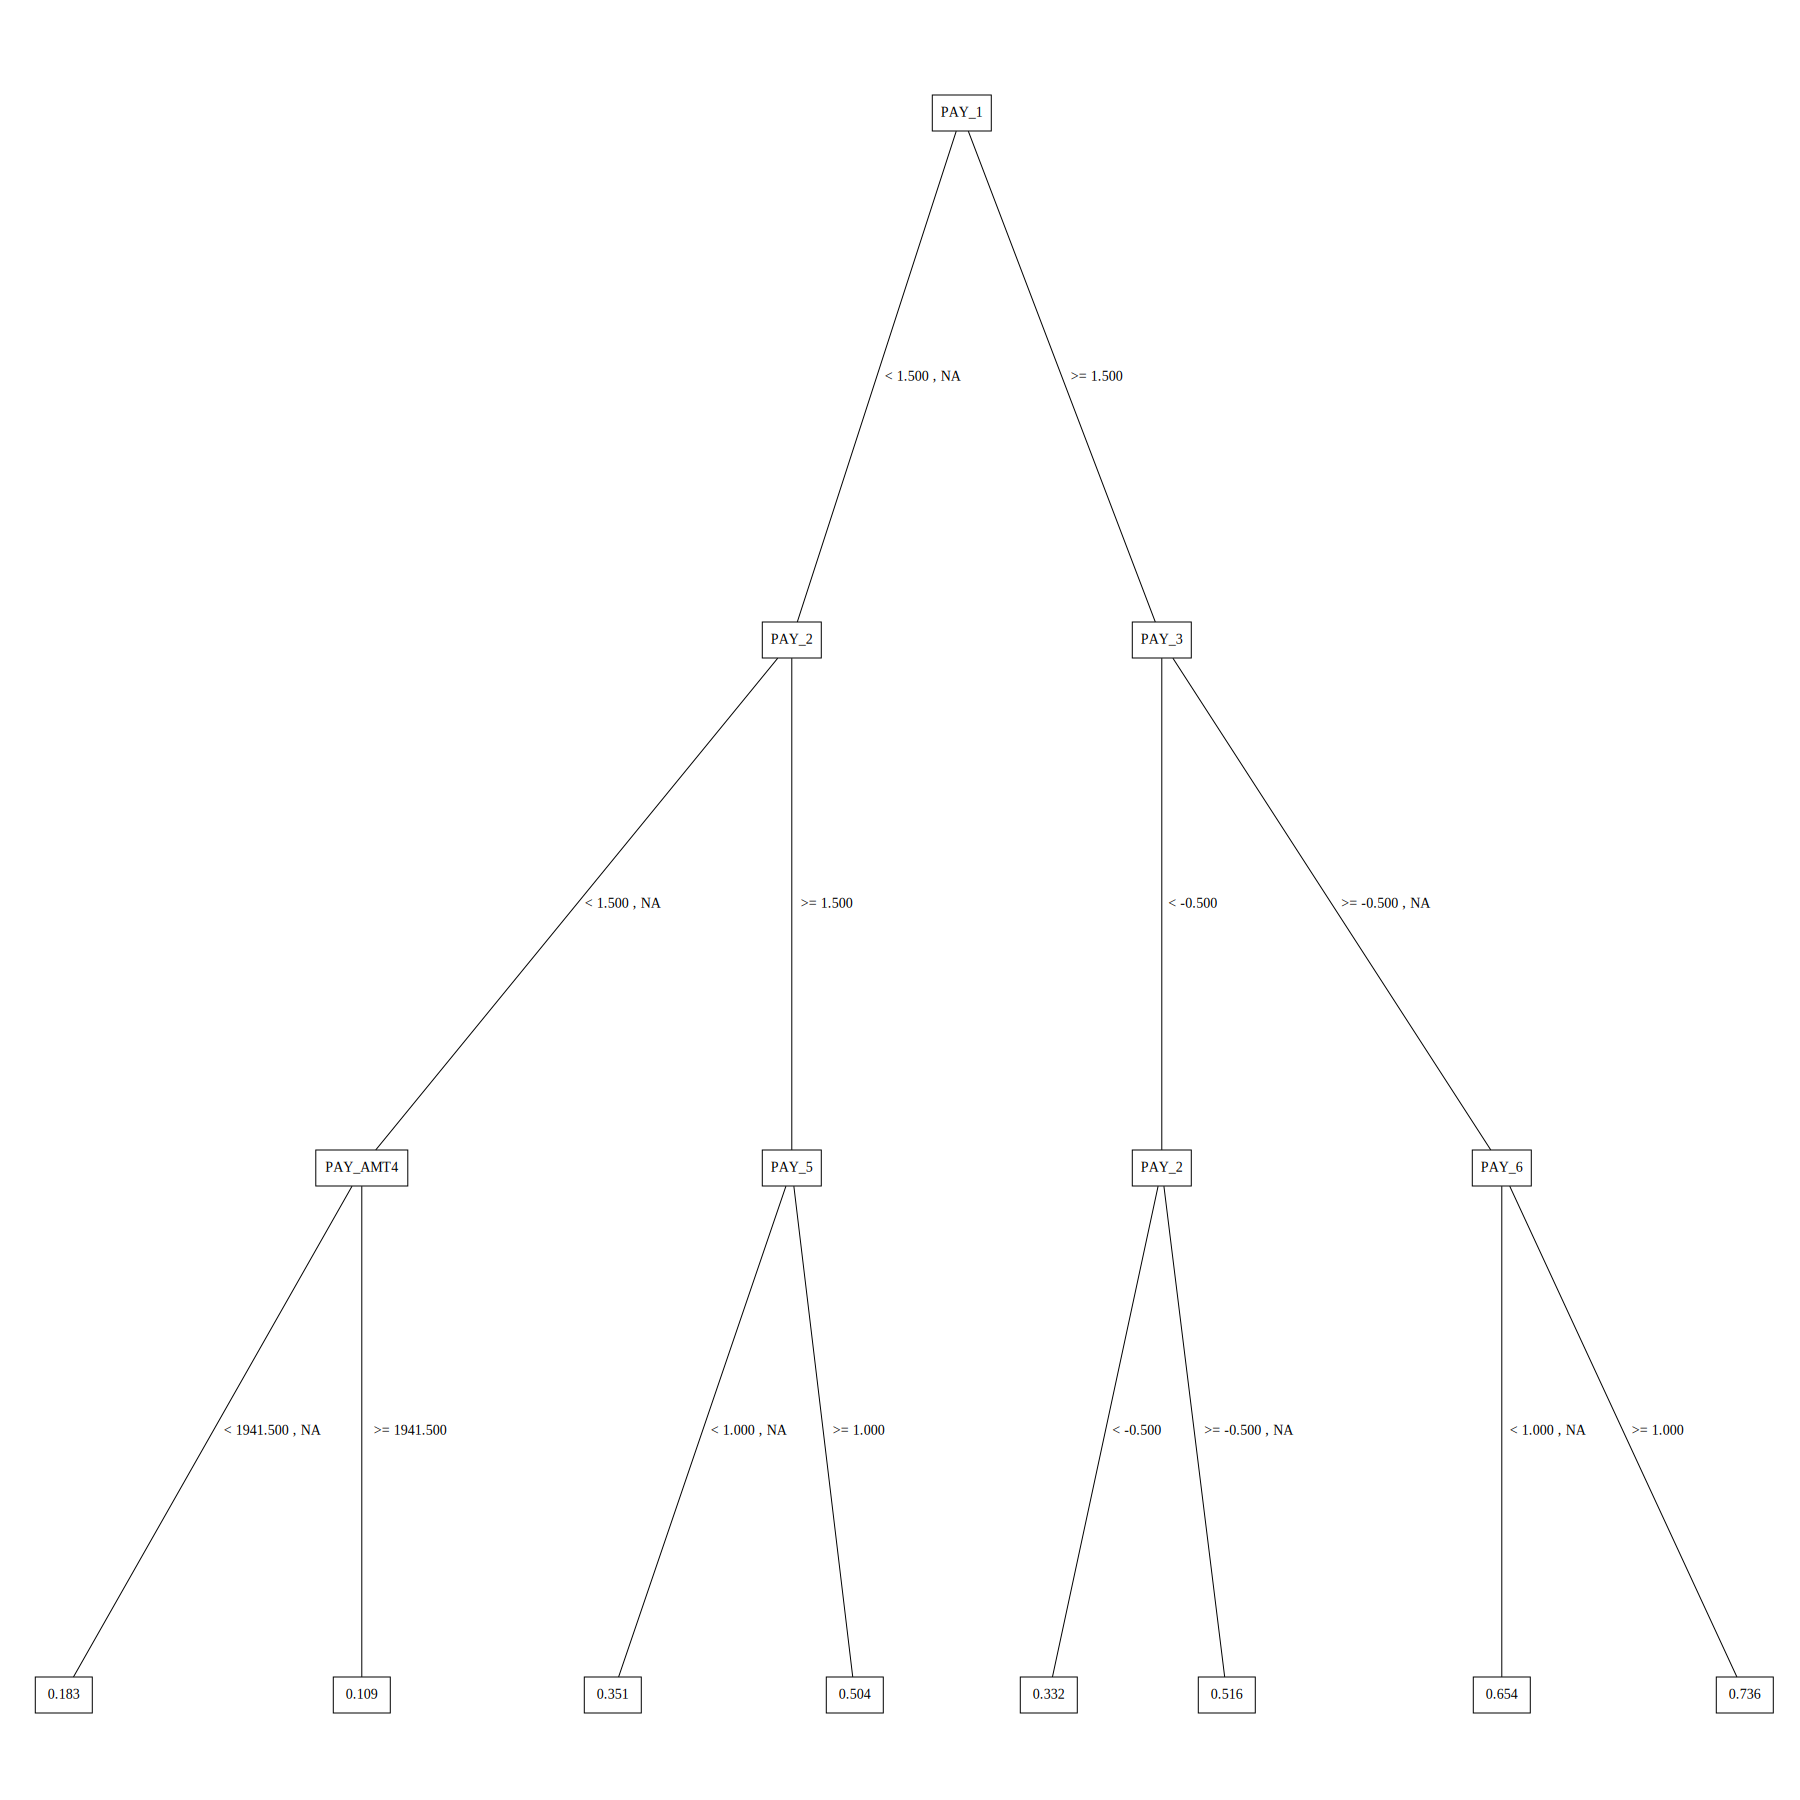

In [50]:
result.plot()

### Save Explainer Data as ZIP Archive

In [51]:
# save the explainer data
result.zip(file_path="./feature-importance-demo-archive.zip")

In [52]:
!unzip -l feature-importance-demo-archive.zip

Archive:  feature-importance-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     4814  2022-08-17 19:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_5005fefe-531d-4ef1-8d7a-295f6a082ece/result_descriptor.json
      131  2022-08-17 19:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_5005fefe-531d-4ef1-8d7a-295f6a082ece/local_decision_tree/application_json.meta
      498  2022-08-17 19:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_5005fefe-531d-4ef1-8d7a-295f6a082ece/local_decision_tree/application_json/explanation.json
      133  2022-08-17 19:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_5005fefe-531d-4ef1-8d7a-295f6a082ece/global_decision_tree/application_json.meta
      652  2022-08-17 19:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer